# Import

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image
import pickle
import os

In [2]:
data_dir = r'\data'

# Setup

<img src='./img/coupled_qubits_sketch.png'> 

In the following experiments, we probe the resonators' and qubits' spectra by measuring in reflection at the readout and drive ports $R_1$ to $R_3$ and applying one or more currents 

\begin{equation*}
\vec{I} = (I_1, I_2, I_3)^{\intercal}
\end{equation*}

through the global bias coils. From the emerging avoided level crossings we extract the periodicities and flux offsets

\begin{equation*}
\vec{\Phi}^{\mathrm{ext}}_{\mathrm{offset}}
\end{equation*}

at each unit cell. Because of the cross-talk of the "big" bias coils, all coils influence each unit cell, such that we have to set up the inductance matrix

\begin{equation*}
\mathbf{L} = 
\begin{pmatrix}
 L_{11} & L_{12} & L_{13}  \\ 
 L_{21} & L_{22} & L_{23}  \\
 L_{31} & L_{32} & L_{33}
\end{pmatrix}.
\end{equation*}

The fluxes are then given by


\begin{equation*}
\vec{\Phi}^{\mathrm{ext}} = \mathbf{L}\vec{I} + \vec{\Phi}^{\mathrm{ext}}_{\mathrm{offset}}
\end{equation*}

with

\begin{equation*}
\vec{\Phi}^{\mathrm{ext}} = (\Phi^{\mathrm{ext}}_1, \Phi^{\mathrm{ext}}_2, \Phi^{\mathrm{ext}}_3)^{\intercal}
\end{equation*}

In the following, we want to observe the avoided crossings between all modes. For that, we sweep the flux with all coils for each resonator. Looking at resonator 1 and sweeping the flux with coil 1 gives us the flux-periodicity of qubit 1. But because qubit 2 is further away from coil 1, qubit 2 might not have moved through resonator 1 and we don't see the crossing. Because of that, we do the same experiment with coil 2 until we see one period of qubit 1. Then we can be sure that we have moved qubit 2 through resonator 1 several times because $L_{22}$ is much bigger than $L_{21}$.

The same logic applies to all measurements.

It might actually be that with this procedure, we don't resolve small crossings because we move qubit 2 through resonator 1 too fast. The resolution of these measurements is therefore not optimal

# Single circuit

We measure qubit 1 (qR7) without a coupler chip (enclosure is empty) in two consecutive cooldowns within a few days (June 2023). There is another chip in enclosure 3, but enclosure 2 is always empty. The chip in enclosure 3 has been changed inbetween cooldown 1 and 2.

## Cooldown 1 

### Resonator Spectroscopy

In [3]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q1_single_circuit_1.pkl', 'rb') as f:
    f_vna__fs_q1_single_circuit_1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q1_single_circuit_1.pkl', 'rb') as f:
    current__fs_q1_single_circuit_1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q1_single_circuit_1.pkl', 'rb') as f:
    phase__fs_q1_single_circuit_1 = pickle.load(f)

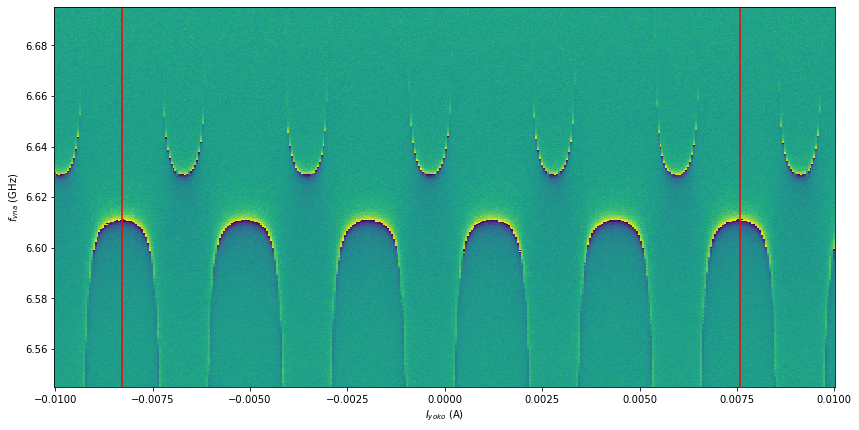

In [4]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_q1_single_circuit_1, f_vna__fs_q1_single_circuit_1*1e-9, phase__fs_q1_single_circuit_1.T, shading = 'auto')


ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{vna}$ (GHz)')
ax.tick_params(axis='both', which='major')

ax.axvline(-0.008275, color = 'red')
ax.axvline(0.007575, color = 'red')

plt.show()

In [5]:
I0 = (0.008275 + 0.007575)/5
print(I0)

0.00317


In [6]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q1_single_circuit_1_crossings.pkl', 'rb') as f:
    f_vna__fs_q1_single_circuit_1_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q1_single_circuit_1_crossings.pkl', 'rb') as f:
    current__fs_q1_single_circuit_1_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q1_single_circuit_1_crossings.pkl', 'rb') as f:
    phase__fs_q1_single_circuit_1_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current_q1_single_circuit_1_crossings.pkl', 'rb') as f:
    current_q1_single_circuit_1_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\freq_q1_single_circuit_1_crossings.pkl', 'rb') as f:
    freq_q1_single_circuit_1_crossings = pickle.load(f)

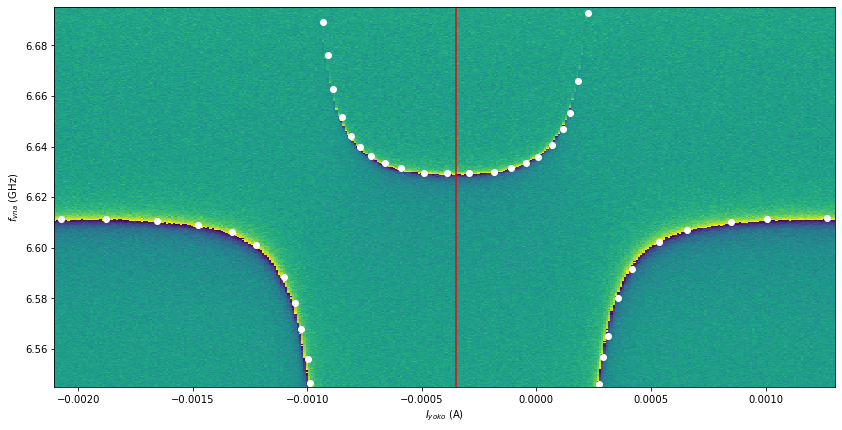

In [7]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_q1_single_circuit_1_crossings, f_vna__fs_q1_single_circuit_1_crossings*1e-9, phase__fs_q1_single_circuit_1_crossings.T, shading = 'auto')

ax.plot(current_q1_single_circuit_1_crossings, freq_q1_single_circuit_1_crossings*1e-9, 'o', color = 'white')

ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{vna}$ (GHz)')
ax.tick_params(axis='both', which='major')

Iss = -0.00035
ax.axvline(Iss, color = 'red')

plt.show()

In [8]:
phase_q1_crossings_CD1 = (current_q1_single_circuit_1_crossings - Iss + I0/2)/I0

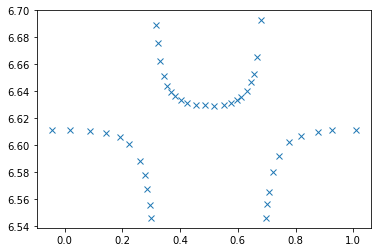

In [9]:
plt.plot(phase_q1_crossings_CD1, freq_q1_single_circuit_1_crossings*1e-9, 'x')

### Qubit spectroscopy 

#### Level 1

In [48]:
with open(os.getcwd() + data_dir + r'\mw_freq__tt_q1_single_circuit_1_up.pkl', 'rb') as f:
    mw_freq__tt_q1_single_circuit_1_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__tt_q1_single_circuit_1_up.pkl', 'rb') as f:
    current__tt_q1_single_circuit_1_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__tt_q1_single_circuit_1_up.pkl', 'rb') as f:
    phase__tt_q1_single_circuit_1_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current_extracted__tt_q1_single_circuit_1_up.pkl', 'rb') as f:
    current_extracted__tt_q1_single_circuit_1_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'\mw_freq_extracted__tt_q1_single_circuit_1_up.pkl', 'rb') as f:
    mw_freq_extracted__tt_q1_single_circuit_1_up = pickle.load(f)

C:\Users\SIMONG~1\AppData\Local\Temp/ipykernel_14504/3510116454.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolor(current__tt_q1_single_circuit_1_up, mw_freq__tt_q1_single_circuit_1_up*1e-9, phase__tt_q1_single_circuit_1_up[:,:,2].T)


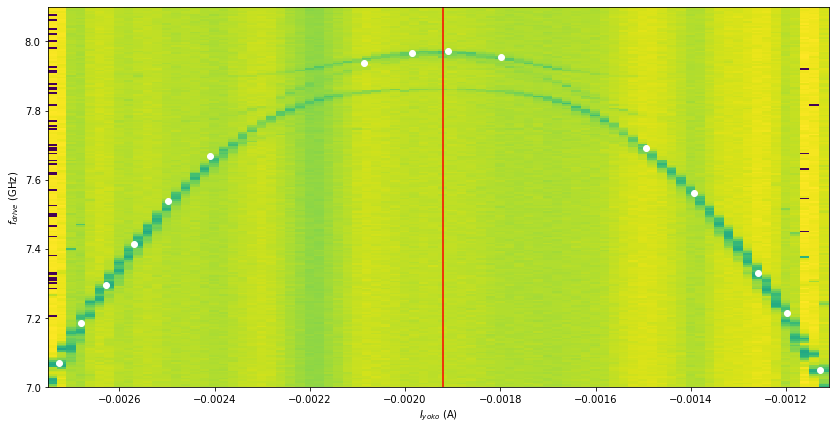

In [49]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__tt_q1_single_circuit_1_up, mw_freq__tt_q1_single_circuit_1_up*1e-9, phase__tt_q1_single_circuit_1_up[:,:,2].T)
ax.plot(current_extracted__tt_q1_single_circuit_1_up, mw_freq_extracted__tt_q1_single_circuit_1_up*1e-9, 'o', color = 'white')

ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{drive}$ (GHz)')
ax.tick_params(axis='both', which='major')

ax.axvline(-0.00192, color = 'red')

plt.show()

In [50]:
with open(os.getcwd() + data_dir + r'\mw_freq__tt_q1_single_circuit_1_down.pkl', 'rb') as f:
    mw_freq__tt_q1_single_circuit_1_down = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__tt_q1_single_circuit_1_down.pkl', 'rb') as f:
    current__tt_q1_single_circuit_1_down = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__tt_q1_single_circuit_1_down.pkl', 'rb') as f:
    phase__tt_q1_single_circuit_1_down = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current_extracted__tt_q1_single_circuit_1_down.pkl', 'rb') as f:
    current_extracted__tt_q1_single_circuit_1_down = pickle.load(f)
with open(os.getcwd() + data_dir + r'\mw_freq_extracted__tt_q1_single_circuit_1_down.pkl', 'rb') as f:
    mw_freq_extracted__tt_q1_single_circuit_1_down = pickle.load(f)

C:\Users\SIMONG~1\AppData\Local\Temp/ipykernel_14504/4167982181.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolor(current__tt_q1_single_circuit_1_down, mw_freq__tt_q1_single_circuit_1_down*1e-9, phase__tt_q1_single_circuit_1_down[:,:,2].T)


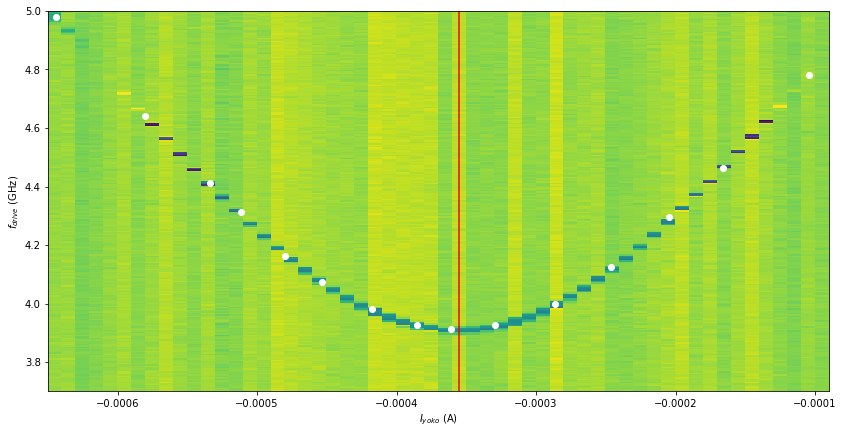

In [51]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__tt_q1_single_circuit_1_down, mw_freq__tt_q1_single_circuit_1_down*1e-9, phase__tt_q1_single_circuit_1_down[:,:,2].T)
ax.plot(current_extracted__tt_q1_single_circuit_1_down, mw_freq_extracted__tt_q1_single_circuit_1_down*1e-9, 'o', color = 'white')

ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{drive}$ (GHz)')
ax.tick_params(axis='both', which='major')

Iss = -0.000355
ax.axvline(Iss, color = 'red')


plt.show()

In [52]:
current_extracted__tt_q1_single_circuit_1 = np.concatenate([current_extracted__tt_q1_single_circuit_1_down, current_extracted__tt_q1_single_circuit_1_up])
mw_freq_extracted__tt_q1_single_circuit_1 = np.concatenate([mw_freq_extracted__tt_q1_single_circuit_1_down, mw_freq_extracted__tt_q1_single_circuit_1_up])

phase__tt_q1_single_circuit_1  = (current_extracted__tt_q1_single_circuit_1 - Iss + I0/2)/I0

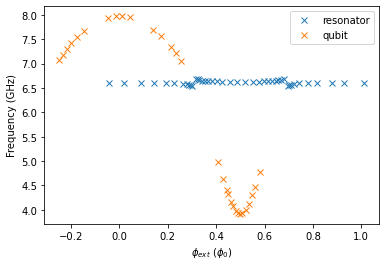

In [53]:
plt.plot(phase_q1_crossings_CD1, freq_q1_single_circuit_1_crossings*1e-9, 'x', label = 'resonator')
plt.plot(phase__tt_q1_single_circuit_1, mw_freq_extracted__tt_q1_single_circuit_1*1e-9, 'x', label = 'qubit')

plt.ylabel('Frequency (GHz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

plt.legend()

#### Fit results (only qubit mode)

In [18]:
Lq = 27.64 # nH
Cq = 24.47 # fF
Ej = 5.06 # GHz --> E/h
fq= 3.913 # GHz

#### Estimate resonator inductance from geometry

In [19]:
# length of qubit loop inductance in um
l_q = 36.7 + 39.3

# asymmetry of qubit loop in um
l_delta = (39.3 - 36.7)/2

#length of readout inductance in um
l_r = 50

#inductance per length (nH/um)
L_um = Lq/l_q

# asymmetry in nH
Delta = l_delta*L_um
# readout inductance in nH
L_r = l_r*L_um

print('Delta = ' + str(Delta))
print('Lr = ' + str(L_r))

# a good estimate for the effective resonator inductance is then
L_R = L_r + Lq/4 # or factor of 4 bigger for you
print('L_R = ' + str(L_R))

Delta = 0.4727894736842095
Lr = 18.184210526315788
L_R = 25.094210526315788


### Higher levels

#### Power sweep at half flux

In [408]:
with open(os.getcwd() + data_dir + r'\mw_freq__tt_q1_single_circuit_higher_levels_power_sweep.pkl', 'rb') as f:
    f_drive__PS_q1_single_circuit_higher_levels = pickle.load(f)
with open(os.getcwd() + data_dir + r'\power__tt_q1_single_circuit_higher_levels_power_sweep.pkl', 'rb') as f:
    power__PS_q1_single_circuit_higher_levels = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__tt_q1_single_circuit_higher_levels_power_sweep.pkl', 'rb') as f:
    phase__PS_q1_single_circuit_higher_levels = pickle.load(f)

In [409]:
phase__PS_q1_single_circuit_higher_levels.shape

(21, 1501, 3)

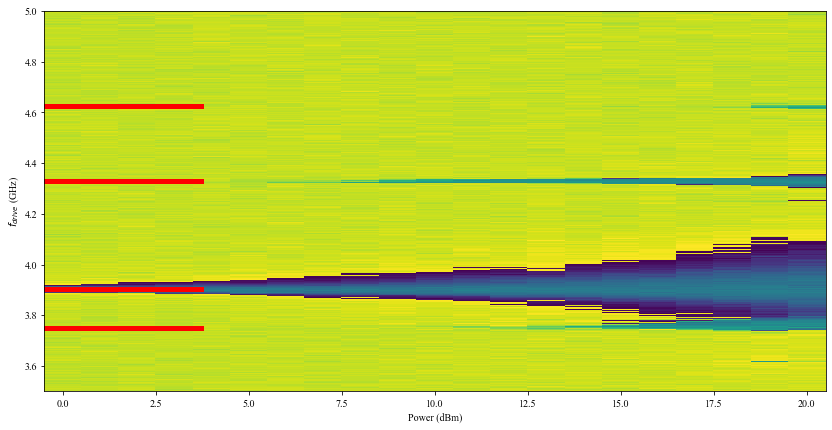

In [410]:
%matplotlib inline

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(power__PS_q1_single_circuit_higher_levels, f_drive__PS_q1_single_circuit_higher_levels*1e-9, phase__PS_q1_single_circuit_higher_levels[:,:,2].T, shading = 'auto')


ax.set_xlabel(r'Power (dBm)')
ax.set_ylabel(r'$f_{drive}$ (GHz)')
ax.tick_params(axis='both', which='major')

ax.axhline(3.905, 0.0, 0.2, color = 'red', lw = 5)
ax.axhline(4.33, 0.0, 0.2, color = 'red', lw = 5)
ax.axhline(4.625, 0.0, 0.2, color = 'red', lw = 5)

ax.axhline(3.75, 0.0, 0.2, color = 'red', lw = 5)


plt.show()

With this Power sweep, we can identify the levels in accordance with their appearance in power. The first level appears at lowest power, the higher levels only at higher powers, because those are multi-photon transitions. Not sure what the transitions below the first level is...

In [411]:
f_01 = 3.905
f_02 = 4.33*2
f_03 = 4.625*3

alpha = f_02 - 2*f_01
print(alpha)

0.8500000000000005


#### Flux sweep around half flux

In [412]:
with open(os.getcwd() + data_dir + r'\mw_freq__tt_q1_single_circuit_higher_levels.pkl', 'rb') as f:
    mw_freq__tt_q1_single_circuit_higher_levels = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__tt_q1_single_circuit_higher_levels.pkl', 'rb') as f:
    current__tt_q1_single_circuit_higher_levels = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__tt_q1_single_circuit_higher_levels.pkl', 'rb') as f:
    phase__tt_q1_single_circuit_higher_levels = pickle.load(f)
    
with open(os.getcwd() + data_dir + r'\current_extracted__tt_q1_single_circuit_level_2_over_2.pkl', 'rb') as f:
    current_extracted__tt_q1_single_circuit_level_2_over_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\mw_freq_extracted__tt_q1_single_circuit_level_2_over_2.pkl', 'rb') as f:
    mw_freq_extracted__tt_q1_single_circuit_level_2_over_2 = pickle.load(f)
    
with open(os.getcwd() + data_dir + r'\current_extracted__tt_q1_single_circuit_level_3_over_3.pkl', 'rb') as f:
    current_extracted__tt_q1_single_circuit_level_3_over_3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\mw_freq_extracted__tt_q1_single_circuit_level_3_over_3.pkl', 'rb') as f:
    mw_freq_extracted__tt_q1_single_circuit_level_3_over_3 = pickle.load(f)

C:\Users\SIMONG~1\AppData\Local\Temp/ipykernel_14504/316816733.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolor(current__tt_q1_single_circuit_higher_levels, mw_freq__tt_q1_single_circuit_higher_levels*1e-9, phase__tt_q1_single_circuit_higher_levels[:,:,2].T)


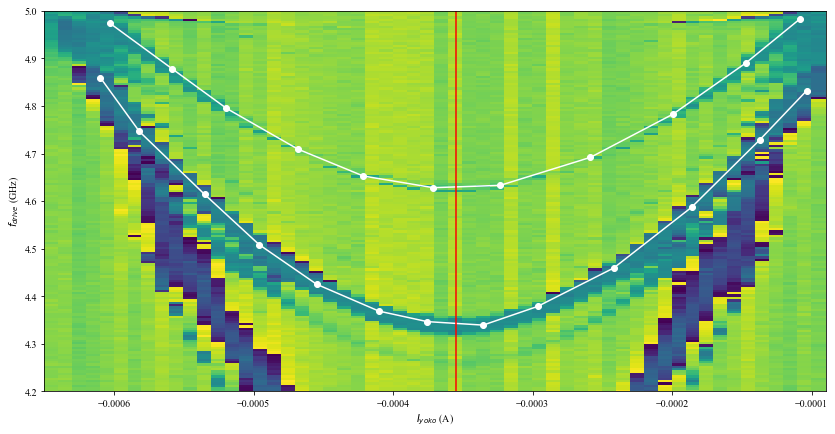

In [413]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__tt_q1_single_circuit_higher_levels, mw_freq__tt_q1_single_circuit_higher_levels*1e-9, phase__tt_q1_single_circuit_higher_levels[:,:,2].T)

ax.plot(current_extracted__tt_q1_single_circuit_level_2_over_2, mw_freq_extracted__tt_q1_single_circuit_level_2_over_2*1e-9, '-o', color = 'white', mfc = 'white')
ax.plot(current_extracted__tt_q1_single_circuit_level_3_over_3, mw_freq_extracted__tt_q1_single_circuit_level_3_over_3*1e-9, '-o', color = 'white', mfc = 'white')


ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{drive}$ (GHz)')
ax.tick_params(axis='both', which='major')

Iss = -0.000355
ax.axvline(Iss, color = 'red')

plt.show()

In [414]:
phase__tt_q1_single_circuit_level_2_over_2  = (current_extracted__tt_q1_single_circuit_level_2_over_2 - Iss + I0/2)/I0
phase__tt_q1_single_circuit_level_3_over_3  = (current_extracted__tt_q1_single_circuit_level_3_over_3 - Iss + I0/2)/I0

In [416]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": 'Times New Roman',
    "font.size"   : 16
})

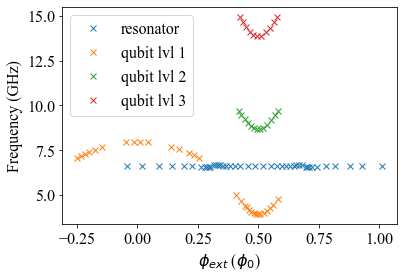

In [417]:
plt.plot(phase_q1_crossings_CD1, freq_q1_single_circuit_1_crossings*1e-9, 'x', label = 'resonator')
plt.plot(phase__tt_q1_single_circuit_1, mw_freq_extracted__tt_q1_single_circuit_1*1e-9, 'x', label = 'qubit lvl 1')

# level 2
plt.plot(phase__tt_q1_single_circuit_level_2_over_2, mw_freq_extracted__tt_q1_single_circuit_level_2_over_2*2*1e-9, 'x', label = 'qubit lvl 2')

# level 3
plt.plot(phase__tt_q1_single_circuit_level_3_over_3, mw_freq_extracted__tt_q1_single_circuit_level_3_over_3*3*1e-9, 'x', label = 'qubit lvl 3')

plt.ylabel('Frequency (GHz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

plt.legend()

## Cooldown 2

### Resonator Spectroscopy

In [16]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q1_single_circuit_2.pkl', 'rb') as f:
    f_vna__fs_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q1_single_circuit_2.pkl', 'rb') as f:
    current__fs_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q1_single_circuit_2.pkl', 'rb') as f:
    phase__fs_q1_single_circuit_2 = pickle.load(f)

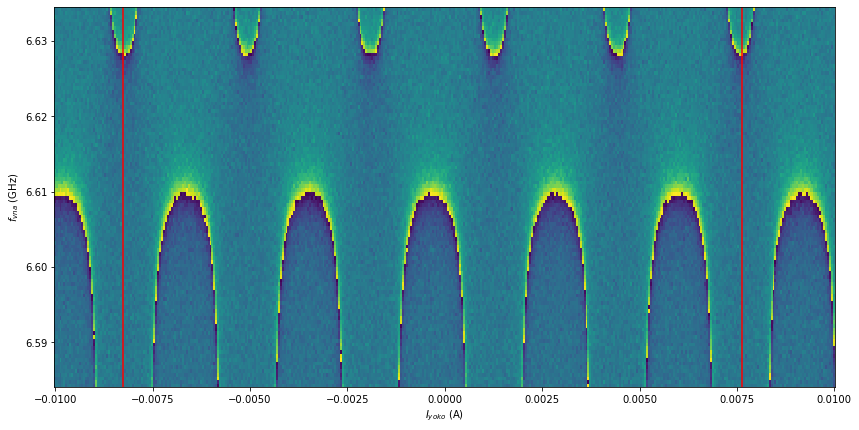

In [17]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_q1_single_circuit_2, f_vna__fs_q1_single_circuit_2*1e-9, phase__fs_q1_single_circuit_2.T, shading = 'auto')


ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{vna}$ (GHz)')
ax.tick_params(axis='both', which='major')


ax.axvline(-0.00825, color = 'red')
ax.axvline(0.00762, color = 'red')


plt.show()

In [18]:
I0 = (0.00825 + 0.00762)/5
print(I0)

0.0031740000000000006


In [19]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q1_single_circuit_2_crossings.pkl', 'rb') as f:
    f_vna__fs_q1_single_circuit_2_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q1_single_circuit_2_crossings.pkl', 'rb') as f:
    current__fs_q1_single_circuit_2_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q1_single_circuit_2_crossings.pkl', 'rb') as f:
    phase__fs_q1_single_circuit_2_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current_q1_single_circuit_2_crossings.pkl', 'rb') as f:
    current_q1_single_circuit_2_crossings = pickle.load(f)
with open(os.getcwd() + data_dir + r'\freq_q1_single_circuit_2_crossings.pkl', 'rb') as f:
    freq_q1_single_circuit_2_crossings = pickle.load(f)

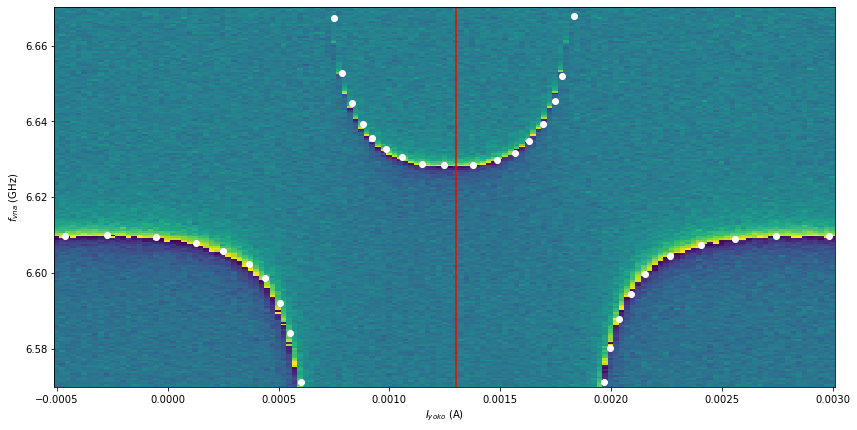

In [20]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_q1_single_circuit_2_crossings, f_vna__fs_q1_single_circuit_2_crossings*1e-9, phase__fs_q1_single_circuit_2_crossings.T, shading = 'auto')

ax.plot(current_q1_single_circuit_2_crossings, freq_q1_single_circuit_2_crossings*1e-9, 'o', color = 'white')

ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{vna}$ (GHz)')
ax.tick_params(axis='both', which='major')

Iss = 0.0013
ax.axvline(Iss, color = 'red')

plt.show()

In [21]:
phase_q1_crossings_CD2 = (current_q1_single_circuit_2_crossings - Iss + I0/2)/I0

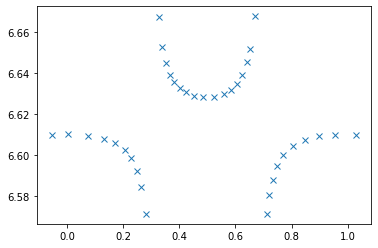

In [22]:
plt.plot(phase_q1_crossings_CD2, freq_q1_single_circuit_2_crossings*1e-9, 'x')

### Qubit spectroscopy 

In [23]:
with open(os.getcwd() + data_dir + r'\mw_freq__tt_q1_single_circuit_2.pkl', 'rb') as f:
    mw_freq__tt_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__tt_q1_single_circuit_2.pkl', 'rb') as f:
    current__tt_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__tt_q1_single_circuit_2.pkl', 'rb') as f:
    phase__tt_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current_extracted__tt_q1_single_circuit_2.pkl', 'rb') as f:
    current_extracted__tt_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\mw_freq_extracted__tt_q1_single_circuit_2.pkl', 'rb') as f:
    mw_freq_extracted__tt_q1_single_circuit_2 = pickle.load(f)

C:\Users\SIMONG~1\AppData\Local\Temp/ipykernel_20920/1560050578.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolor(current__tt_q1_single_circuit_2, mw_freq__tt_q1_single_circuit_2*1e-9, phase__tt_q1_single_circuit_2[:,:,2].T)


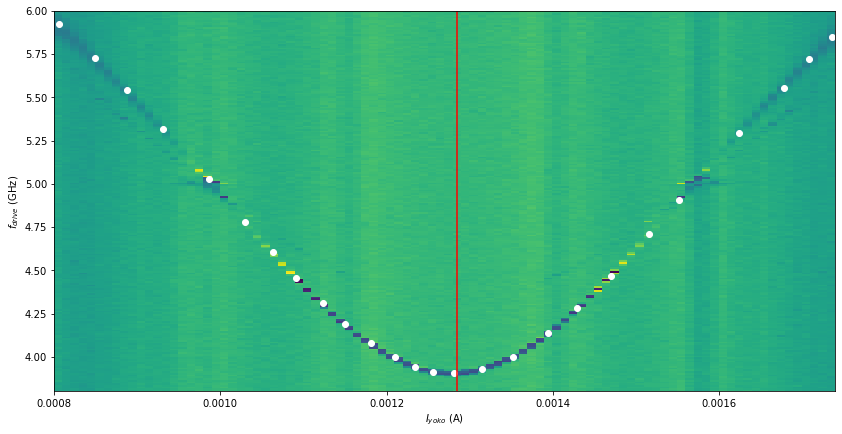

In [24]:
%matplotlib inline
#%matplotlib widget

fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__tt_q1_single_circuit_2, mw_freq__tt_q1_single_circuit_2*1e-9, phase__tt_q1_single_circuit_2[:,:,2].T)
ax.plot(current_extracted__tt_q1_single_circuit_2, mw_freq_extracted__tt_q1_single_circuit_2*1e-9, 'o', color = 'white')

ax.set_xlabel(r'$I_{yoko}$ (A)')
ax.set_ylabel(r'$f_{drive}$ (GHz)')
ax.tick_params(axis='both', which='major')

Iss = 0.001285
ax.axvline(Iss, color = 'red')

plt.show()

In [25]:
phase__tt_q1_single_circuit_2  = (current_extracted__tt_q1_single_circuit_2 - Iss + I0/2)/I0

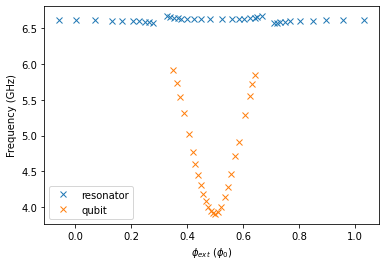

In [26]:
plt.plot(phase_q1_crossings_CD2, freq_q1_single_circuit_2_crossings*1e-9, 'x', label = 'resonator')
plt.plot(phase__tt_q1_single_circuit_2, mw_freq_extracted__tt_q1_single_circuit_2*1e-9, 'x', label = 'qubit')

plt.ylabel('Frequency (GHz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

plt.legend()

### Fit results (only qubit mode)

In [100]:
Lq =  25.80 # nH
Cq = 26.39 # fF
Ej = 5.27 # GHz --> E/h
fq= 3.907 # GHz

### Estimate resonator inductance from geometry

In [101]:
# length of qubit loop inductance in um
l_q = 36.7 + 39.3

# asymmetry of qubit loop in um
l_delta = (39.3 - 36.7)/2

#length of readout inductance in um
l_r = 50

#inductance per length (nH/um)
L_um = Lq/l_q

# asymmetry in nH
Delta = l_delta*L_um
# readout inductance in nH
L_r = l_r*L_um

print('Delta = ' + str(Delta))
print('Lr = ' + str(L_r))

# a good estimate for the effective resonator inductance is then
L_R = L_r + Lq/4 # or factor of 4 bigger for you
print('L_R = ' + str(L_R))

Delta = 0.4413157894736833
Lr = 16.973684210526315
L_R = 23.423684210526314


### Dispersive Shift

We measure the dispersive shift by measuring the resonator response in time domain at low power (close to single photon) and resolving the 2 pointer states of the resonator belonging to the qubit in ground and excited, respectively. The two responses are fitted with a gaussian-mixture model and the angles of the center point of the pointer states are extracted and plotted below. So what you see are the 2 distinct phase rolls of the 2 resonances for either qubit in ground or excited. The shift should coincide with the energy difference in the spectrum

\begin{equation}
\chi = \frac{  (E_{11} - E_{10}) - (E_{01} - E_{00})  }{h},
\end{equation}

where $E_{ij}$ are the sorted energy levels with qubit (i) and resonator (j) photon numbers.

In [27]:
with open(os.getcwd() + data_dir + r'\freq__disp_shift_q1_single_circuit_2.pkl', 'rb') as f:
    freq__disp_shift_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase_0__disp_shift_q1_single_circuit_2.pkl', 'rb') as f:
    phase_0__disp_shift_q1_single_circuit_2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase_1__disp_shift_q1_single_circuit_2.pkl', 'rb') as f:
    phase_1__disp_shift_q1_single_circuit_2 = pickle.load(f)

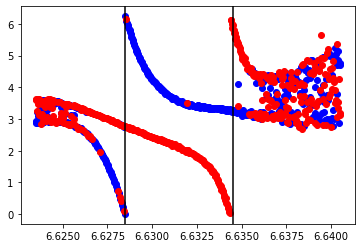

In [28]:
plt.plot(freq__disp_shift_q1_single_circuit_2*1e-9, phase_0__disp_shift_q1_single_circuit_2%(2*np.pi), 'o', color = 'blue')
plt.plot(freq__disp_shift_q1_single_circuit_2*1e-9, phase_1__disp_shift_q1_single_circuit_2%(2*np.pi), 'o', color = 'red')
plt.axvline(6.6285, color = 'black')
plt.axvline(6.6345, color = 'black')

$\chi \approx 6$ MHz

## Compare cooldown 1 and cooldown 2

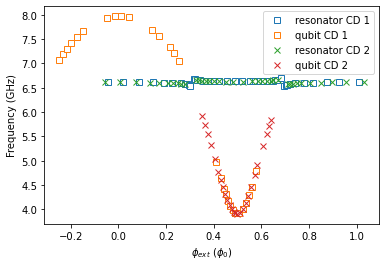

In [29]:
plt.plot(phase_q1_crossings_CD1, freq_q1_single_circuit_1_crossings*1e-9, 's', mfc = 'white', label = 'resonator CD 1')
plt.plot(phase__tt_q1_single_circuit_1, mw_freq_extracted__tt_q1_single_circuit_1*1e-9, 's', mfc = 'white', label = 'qubit CD 1')

plt.plot(phase_q1_crossings_CD2, freq_q1_single_circuit_2_crossings*1e-9, 'x', label = 'resonator CD 2')
plt.plot(phase__tt_q1_single_circuit_2, mw_freq_extracted__tt_q1_single_circuit_2*1e-9, 'x', label = 'qubit CD 2')

plt.ylabel('Frequency (GHz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

plt.legend()

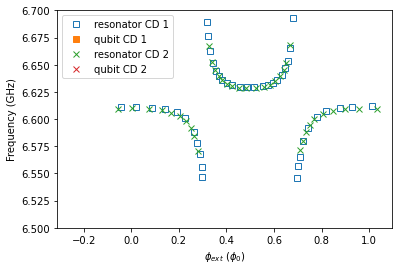

In [30]:
plt.plot(phase_q1_crossings_CD1, freq_q1_single_circuit_1_crossings*1e-9, 's', mfc = 'white', label = 'resonator CD 1')
plt.plot(phase__tt_q1_single_circuit_1, mw_freq_extracted__tt_q1_single_circuit_1*1e-9, 's', label = 'qubit CD 1')

plt.plot(phase_q1_crossings_CD2, freq_q1_single_circuit_2_crossings*1e-9, 'x', label = 'resonator CD 2')
plt.plot(phase__tt_q1_single_circuit_2, mw_freq_extracted__tt_q1_single_circuit_2*1e-9, 'x', label = 'qubit CD 2')

plt.ylabel('Frequency (GHz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

plt.ylim([6.5, 6.7])

plt.legend()

# Resonator 1

## Coil 1: Sweep $I_1$

In [31]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_rough_q1_coil1.pkl', 'rb') as f:
    f_vna__fs_rough_q1_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_rough_q1_coil1.pkl', 'rb') as f:
    current__fs_rough_q1_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_rough_q1_coil1.pkl', 'rb') as f:
    phase__fs_rough_q1_coil1 = pickle.load(f)

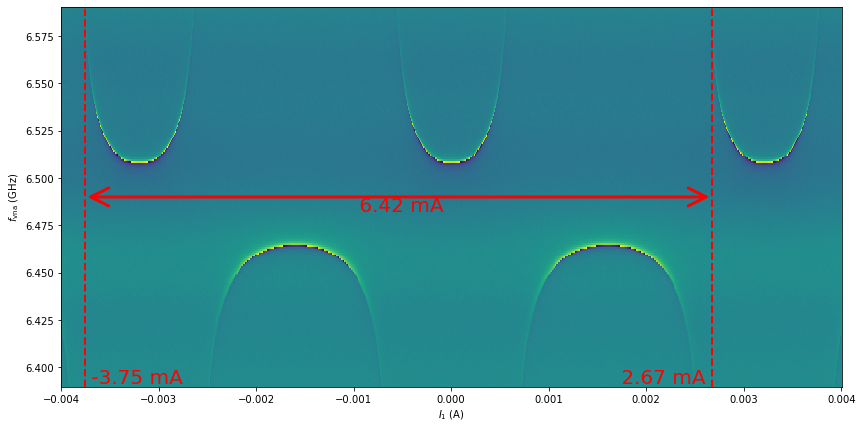

I0__q1 = 3.21 mA


In [32]:
fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_rough_q1_coil1, f_vna__fs_rough_q1_coil1*1e-9, phase__fs_rough_q1_coil1.T, shading = 'auto')

I_ss_low__fs = -0.00375
ax.axvline(x=I_ss_low__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA'.format(round(I_ss_low__fs*1e3,3)), x=I_ss_low__fs, y=ax.get_ylim()[0], ha='left', va='bottom', color ='red',
        size=20)

I_ss_up__fs = 0.00267
ax.axvline(x=I_ss_up__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA '.format(round(I_ss_up__fs*1e3,3)), x=I_ss_up__fs, y=ax.get_ylim()[0], ha='right', va='bottom', color ='red',
        size=20)

Anzahl_Perioden = 2
I0_q1 = (I_ss_up__fs - I_ss_low__fs)/Anzahl_Perioden


ax.annotate(xy=(I_ss_low__fs,np.mean(ax.get_ylim())),xytext=(I_ss_up__fs,np.mean(ax.get_ylim())), text='', arrowprops=dict(arrowstyle='<->,head_length=1.8,head_width=0.9',
                                        lw=3,color='red'))
ax.text(s=' {} mA'.format(round(I0_q1*1e3*Anzahl_Perioden,5)), x=I_ss_low__fs+I0_q1/2*Anzahl_Perioden, y=np.mean(ax.get_ylim()), ha='center', va='top', color ='red',
        size=20)

ax.set_xlabel(r'$I_1$ (A)')
ax.set_ylabel(r'$f_{\rm vna}$ (GHz)')
plt.show()

print('I0__q1 = {} mA'.format(I0_q1*1e3))

In [33]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q1_coil1.pkl', 'rb') as f:
    f_vna__fs_q1_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fs_q1_coil1.pkl', 'rb') as f:
    current__fs_q1_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\phase__fs_q1_coil1.pkl', 'rb') as f:
    phase__fs_q1_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fres_q1_coil1.pkl', 'rb') as f:
    current_q1_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\fres__fres_q1_coil1.pkl', 'rb') as f:
    fres_q1_coil1 = pickle.load(f)
    
current_q1_coil1 = np.concatenate([current_q1_coil1[0], current_q1_coil1[1], current_q1_coil1[2]])
fres_q1_coil1 = np.concatenate([fres_q1_coil1[0], fres_q1_coil1[1], fres_q1_coil1[2]])

I_ss__q1_fs= 0.0112 mA
fr_ss__q1= 6.5086 GHz


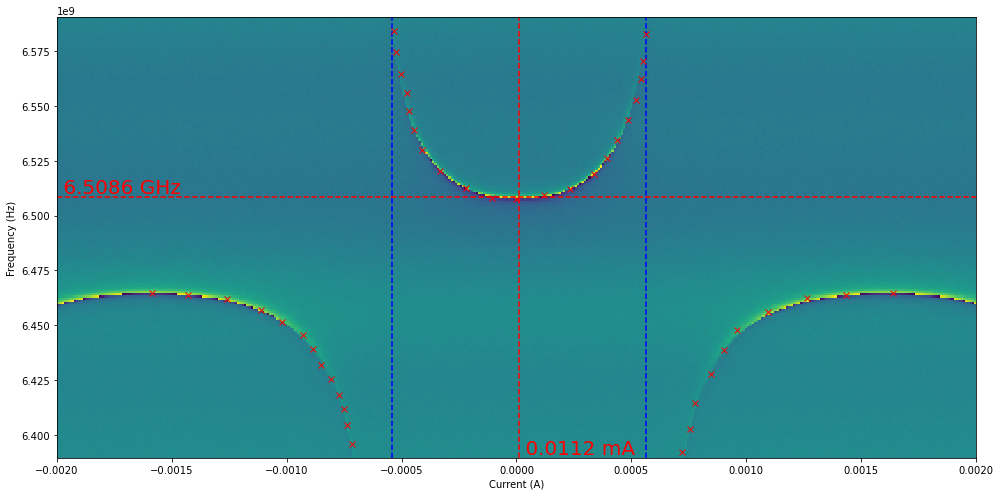

In [34]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q1_coil1, f_vna__fs_q1_coil1, phase__fs_q1_coil1.T,shading='auto')

I_ss__q1_fs = 1.12*1e-5
ax.axvline(x=I_ss__q1_fs,ls='--',color='red')
ax.text(s=' {} mA'.format(round(I_ss__q1_fs*1e3,5)),x=I_ss__q1_fs, y=ax.get_ylim()[0], ha='left', va='bottom', size=20,color='red')
print('I_ss__q1_fs= {} mA'.format(round(I_ss__q1_fs*1e3,5)))

ax.axvline(x=-0.000541, ls='--', color='blue')
ax.axvline(x=0.000565, ls='--', color='blue')    

ax.set_xlim([-0.002,0.002])
if True:
    fr_ss__q1=6.5086*1e9
    ax.axhline(y=fr_ss__q1, ls='--', color='red')
    ax.text(s=' {} GHz'.format(round(fr_ss__q1*1e-9,5)),x=ax.get_xlim()[0],y=fr_ss__q1, ha='left', va='bottom', size=20,color='red')
    print('fr_ss__q1= {} GHz'.format(round(fr_ss__q1*1e-9,5)))

ax.plot(current_q1_coil1, fres_q1_coil1, marker='x',color='red',ls='')

ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

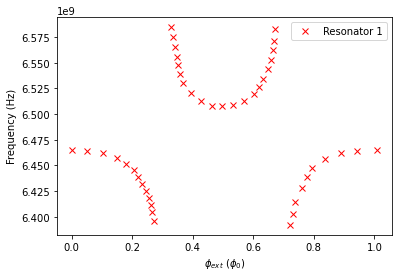

In [35]:
phi_q1_coil1 = (current_q1_coil1 - I_ss__q1_fs + I0_q1/2  ) /I0_q1
plt.plot(phi_q1_coil1, fres_q1_coil1, marker='x',color='red',ls='', label = 'Resonator 1')

plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')
plt.legend()

## Coil 2: Sweep $I_2$

In [36]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q1_coil2.pkl', 'rb') as f:
    f_vna__fs_q1_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q1_coil2.pkl', 'rb') as f:
    current__fs_q1_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q1_coil2.pkl', 'rb') as f:
    phase__fs_q1_coil2 = pickle.load(f)

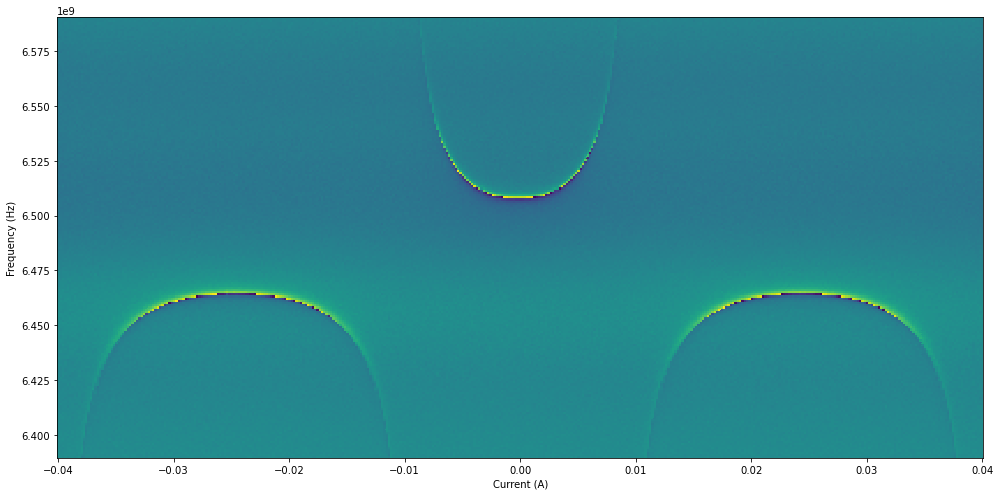

In [37]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q1_coil2, f_vna__fs_q1_coil2, phase__fs_q1_coil2.T,shading='auto')


ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

No additional crossings

## Coil 3: Sweep $I_3$

In [38]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q1_coil3.pkl', 'rb') as f:
    f_vna__fs_q1_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q1_coil3.pkl', 'rb') as f:
    current__fs_q1_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q1_coil3.pkl', 'rb') as f:
    phase__fs_q1_coil3 = pickle.load(f)

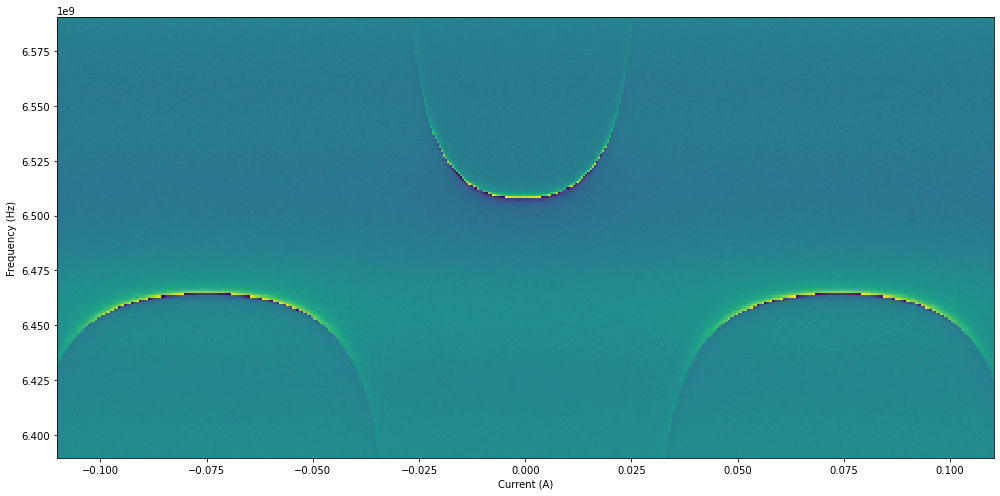

In [39]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q1_coil3, f_vna__fs_q1_coil3, phase__fs_q1_coil3.T,shading='auto')


ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

No additional crossings

# Resonator 3

## Coil 3: Sweep $I_3$

In [40]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_rough_q3_coil3.pkl', 'rb') as f:
    f_vna__fs_rough_q3_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_rough_q3_coil3.pkl', 'rb') as f:
    current__fs_rough_q3_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_rough_q3_coil3.pkl', 'rb') as f:
    phase__fs_rough_q3_coil3 = pickle.load(f)

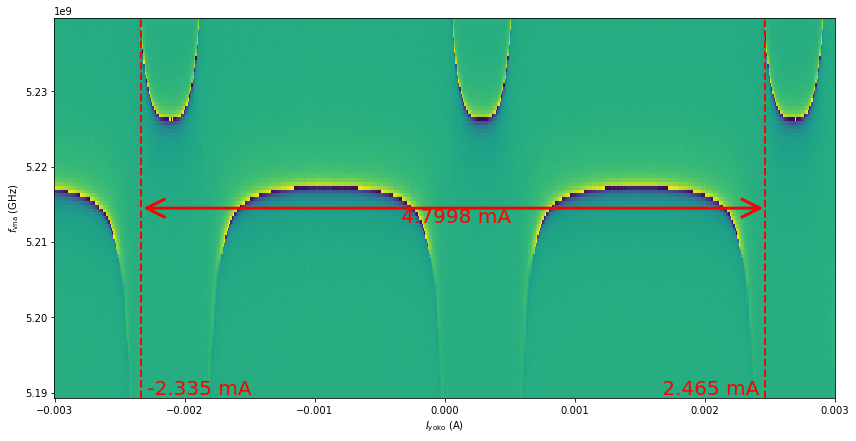

I0__q3 = 2.3999 mA


In [41]:
fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_rough_q3_coil3, f_vna__fs_rough_q3_coil3, phase__fs_rough_q3_coil3.T, shading = 'auto')

I_ss_low__fs = -0.002335
ax.axvline(x=I_ss_low__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA'.format(round(I_ss_low__fs*1e3,3)), x=I_ss_low__fs, y=ax.get_ylim()[0], ha='left', va='bottom', color ='red',
        size=20)

I_ss_up__fs = 0.0024648
ax.axvline(x=I_ss_up__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA '.format(round(I_ss_up__fs*1e3,3)), x=I_ss_up__fs, y=ax.get_ylim()[0], ha='right', va='bottom', color ='red',
        size=20)

Anzahl_Perioden = 2
I0_q3 = (I_ss_up__fs - I_ss_low__fs)/Anzahl_Perioden


ax.annotate(xy=(I_ss_low__fs,np.mean(ax.get_ylim())),xytext=(I_ss_up__fs,np.mean(ax.get_ylim())), text='', arrowprops=dict(arrowstyle='<->,head_length=1.8,head_width=0.9',
                                        lw=3,color='red'))
ax.text(s=' {} mA'.format(round(I0_q3*1e3*Anzahl_Perioden,5)), x=I_ss_low__fs+I0_q3/2*Anzahl_Perioden, y=np.mean(ax.get_ylim()), ha='center', va='top', color ='red',
        size=20)

#ax.set_xlim([0,0.34*1e-3])

ax.set_xlabel(r'$I_{\rm yoko}$ (A)')
ax.set_ylabel(r'$f_{\rm vna}$ (GHz)')
plt.show()

print('I0__q3 = {} mA'.format(I0_q3*1e3))

In [42]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q3_coil3.pkl', 'rb') as f:
    f_vna__fs_q3_coil3 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fs_q3_coil3.pkl', 'rb') as f:
    current__fs_q3_coil3 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\phase__fs_q3_coil3.pkl', 'rb') as f:
    phase__fs_q3_coil3 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fres_q3_coil3.pkl', 'rb') as f:
    current_q3_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\fres__fres_q3_coil3.pkl', 'rb') as f:
    fres_q3_coil3 = pickle.load(f)
    
current_q3_coil3 = np.concatenate([current_q3_coil3[0], current_q3_coil3[1], current_q3_coil3[2]])
fres_q3_coil3 = np.concatenate([fres_q3_coil3[0], fres_q3_coil3[1], fres_q3_coil3[2]])

I_ss__q3_fs= 0.29 mA
fr_ss__q3= 5.22635 GHz


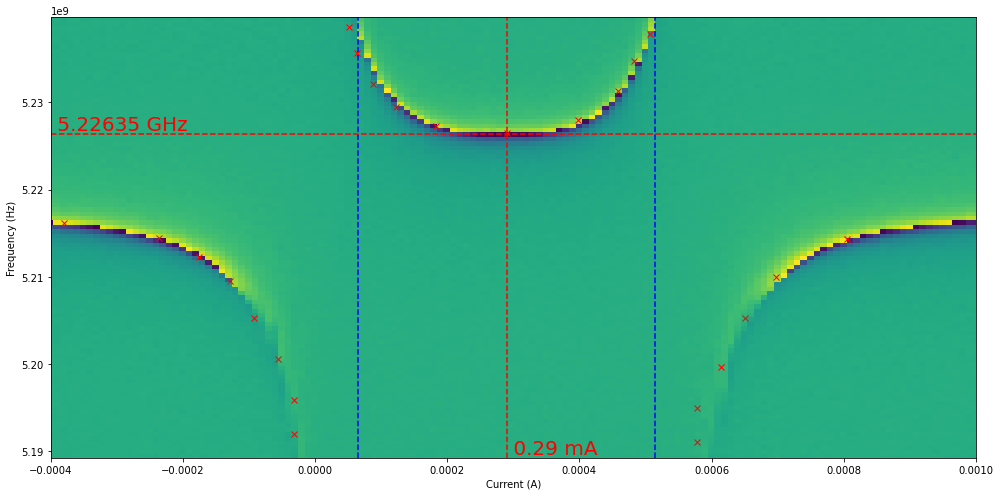

In [43]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q3_coil3, f_vna__fs_q3_coil3, phase__fs_q3_coil3.T,shading='auto')


if True:
    I_ss__q3_fs = 0.00029
    ax.axvline(x=I_ss__q3_fs,ls='--',color='red')
    ax.text(s=' {} mA'.format(round(I_ss__q3_fs*1e3,5)),x=I_ss__q3_fs, y=ax.get_ylim()[0], ha='left', va='bottom', size=20,color='red')
    print('I_ss__q3_fs= {} mA'.format(round(I_ss__q3_fs*1e3,5)))
    
    ax.axvline(x=6.505*1e-5, ls='--', color='blue')
    ax.axvline(x=0.000514, ls='--', color='blue')    
    #print((-0.000541+0.000565)/2)

ax.set_xlim([-0.0004,0.001])

if True:
    fr_ss__q3=5.22635*1e9
    ax.axhline(y=fr_ss__q3, ls='--', color='red')
    ax.text(s=' {} GHz'.format(round(fr_ss__q3*1e-9,5)),x=ax.get_xlim()[0],y=fr_ss__q3, ha='left', va='bottom', size=20,color='red')
    print('fr_ss__q3= {} GHz'.format(round(fr_ss__q3*1e-9,5)))

ax.plot(current_q3_coil3, fres_q3_coil3, marker='x',color='red',ls='')

ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

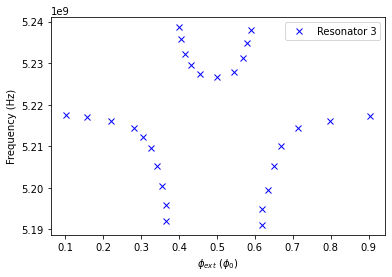

In [44]:
phi_q3_coil3 = (current_q3_coil3 - I_ss__q3_fs + I0_q3/2  ) /I0_q3
plt.plot(phi_q3_coil3, fres_q3_coil3, marker='x',color='blue',ls='', label = 'Resonator 3')

plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')
plt.legend()

## Coil 1: Sweep $I_1$

In [45]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q3_coil1.pkl', 'rb') as f:
    f_vna__fs_q3_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q3_coil1.pkl', 'rb') as f:
    current__fs_q3_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q3_coil1.pkl', 'rb') as f:
    phase__fs_q3_coil1 = pickle.load(f)

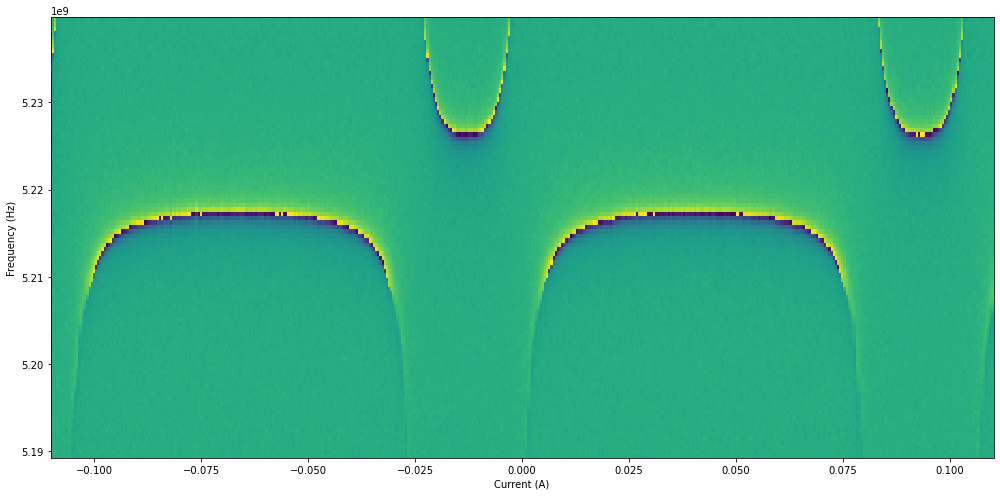

In [46]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q3_coil1, f_vna__fs_q3_coil1, phase__fs_q3_coil1.T,shading='auto')


ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

No additional crossings

## Coil 2: Sweep $I_2$

In [47]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q3_coil2.pkl', 'rb') as f:
    f_vna__fs_q3_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q3_coil2.pkl', 'rb') as f:
    current__fs_q3_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q3_coil2.pkl', 'rb') as f:
    phase__fs_q3_coil2 = pickle.load(f)

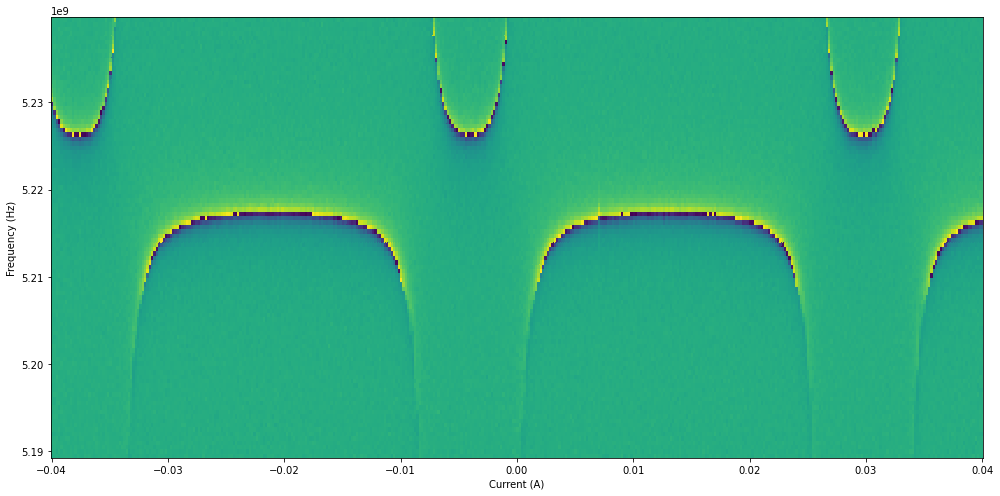

In [48]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q3_coil2, f_vna__fs_q3_coil2, phase__fs_q3_coil2.T,shading='auto')


ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

tiny feature at ~7mA

# Resonator 2

## Coil 2: Sweep $I_2$

In [49]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_rough_q2_coil2.pkl', 'rb') as f:
    f_vna__fs_rough_q2_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_rough_q2_coil2.pkl', 'rb') as f:
    current__fs_rough_q2_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_rough_q2_coil2.pkl', 'rb') as f:
    phase__fs_rough_q2_coil2 = pickle.load(f)

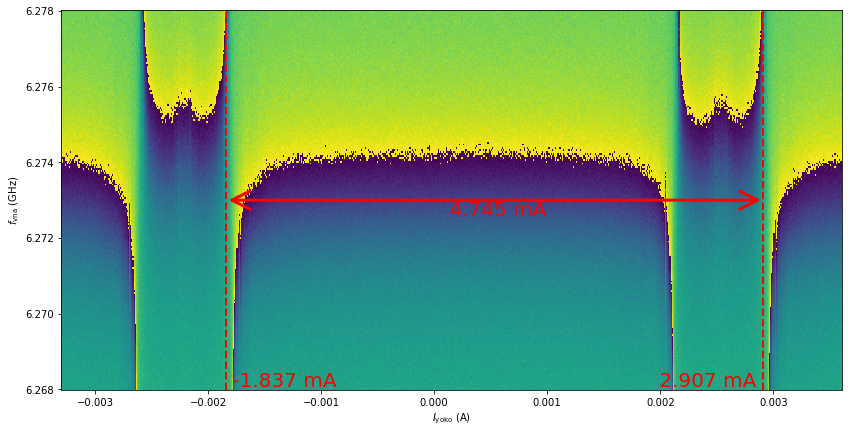

I0__q2 = 4.745 mA


In [50]:
fig,ax = plt.subplots(1,1,figsize = (14,7))

ax.pcolor(current__fs_rough_q2_coil2, f_vna__fs_rough_q2_coil2*1e-9, phase__fs_rough_q2_coil2.T, shading = 'auto')

I_ss_low__fs = -0.0018375
ax.axvline(x=I_ss_low__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA'.format(round(I_ss_low__fs*1e3,3)), x=I_ss_low__fs, y=ax.get_ylim()[0], ha='left', va='bottom', color ='red',
        size=20)

I_ss_up__fs = 0.0029075
ax.axvline(x=I_ss_up__fs,color='red',ls='--',lw=2)
ax.text(s=' {} mA '.format(round(I_ss_up__fs*1e3,3)), x=I_ss_up__fs, y=ax.get_ylim()[0], ha='right', va='bottom', color ='red',
        size=20)

Anzahl_Perioden = 1
I0_c2 = (I_ss_up__fs - I_ss_low__fs)/Anzahl_Perioden


ax.annotate(xy=(I_ss_low__fs,np.mean(ax.get_ylim())),xytext=(I_ss_up__fs,np.mean(ax.get_ylim())), text='', arrowprops=dict(arrowstyle='<->,head_length=1.8,head_width=0.9',
                                        lw=3,color='red'))
ax.text(s=' {} mA'.format(round(I0_c2*1e3*Anzahl_Perioden,5)), x=I_ss_low__fs+I0_c2/2*Anzahl_Perioden, y=np.mean(ax.get_ylim()), ha='center', va='top', color ='red',
        size=20)

#ax.set_xlim([0,0.34*1e-3])

ax.set_xlabel(r'$I_{\rm yoko}$ (A)')
ax.set_ylabel(r'$f_{\rm vna}$ (GHz)')
plt.show()

print('I0__q2 = {} mA'.format(I0_c2*1e3))

In [51]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q2_coil2.pkl', 'rb') as f:
    f_vna__fs_q2_coil2 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fs_q2_coil2.pkl', 'rb') as f:
    current__fs_q2_coil2 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\phase__fs_q2_coil2.pkl', 'rb') as f:
    phase__fs_q2_coil2 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fres_q2_coil2.pkl', 'rb') as f:
    current_q2_coil2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\fres__fres_q2_coil2.pkl', 'rb') as f:
    fres_q2_coil2 = pickle.load(f)
    
current_q2_coil2 = np.concatenate([current_q2_coil2[0], current_q2_coil2[1], current_q2_coil2[2]])
fres_q2_coil2 = np.concatenate([fres_q2_coil2[0], fres_q2_coil2[1], fres_q2_coil2[2]])

I_ss__c2_fs= 2.54 mA
fr_ss__c2= 6.27544 GHz


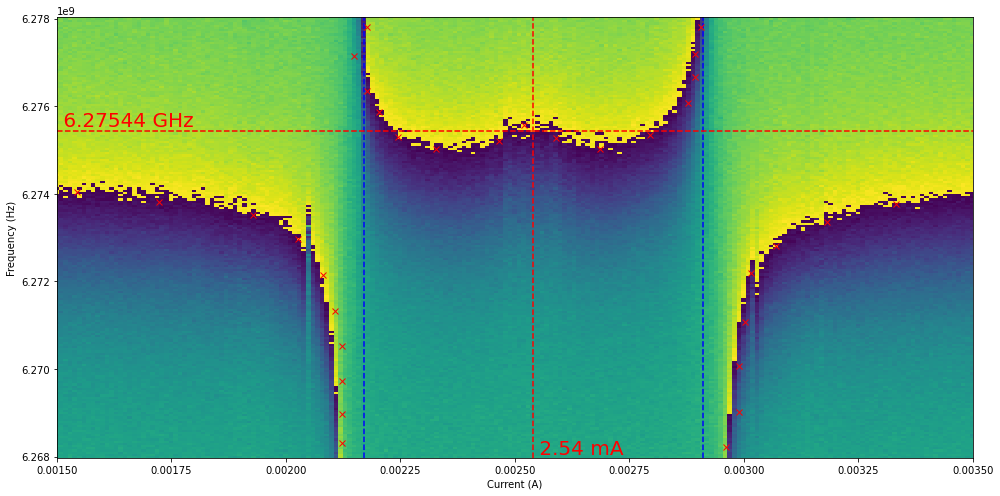

In [52]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q2_coil2, f_vna__fs_q2_coil2, phase__fs_q2_coil2.T,shading='auto')


if True:
    I_ss__c2_fs = 0.00254
    ax.axvline(x=I_ss__c2_fs,ls='--',color='red')
    ax.text(s=' {} mA'.format(round(I_ss__c2_fs*1e3,5)),x=I_ss__c2_fs, y=ax.get_ylim()[0], ha='left', va='bottom', size=20,color='red')
    print('I_ss__c2_fs= {} mA'.format(round(I_ss__c2_fs*1e3,5)))
    
    ax.axvline(x=0.00217, ls='--', color='blue')
    ax.axvline(x=0.00291, ls='--', color='blue')    
    #print((-0.000541+0.000565)/2)

ax.set_xlim([0.0015,0.0035])
if True:
    fr_ss__c2=6.27544*1e9
    ax.axhline(y=fr_ss__c2, ls='--', color='red')
    ax.text(s=' {} GHz'.format(round(fr_ss__c2*1e-9,5)),x=ax.get_xlim()[0],y=fr_ss__c2, ha='left', va='bottom', size=20,color='red')
    print('fr_ss__c2= {} GHz'.format(round(fr_ss__c2*1e-9,5)))

ax.plot(current_q2_coil2, fres_q2_coil2, marker='x',color='red',ls='')

ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

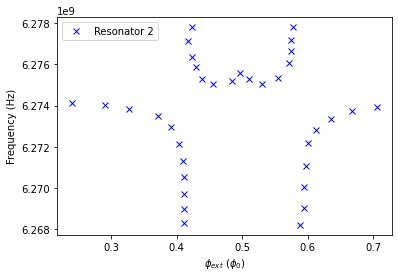

In [53]:
phi_q2_coil2 = (current_q2_coil2 - I_ss__c2_fs + I0_c2/2  ) /I0_c2
plt.plot(phi_q2_coil2, fres_q2_coil2, marker='x',color='blue',ls='', label = 'Resonator 2')

plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')
plt.legend()

## Coil 1: Sweep $I_1$

In [54]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q2_coil1.pkl', 'rb') as f:
    f_vna__fs_q2_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fs_q2_coil1.pkl', 'rb') as f:
    current__fs_q2_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\phase__fs_q2_coil1.pkl', 'rb') as f:
    phase__fs_q2_coil1 = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\current__fres_q2_coil1.pkl', 'rb') as f:
    current_q2_coil1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\fres__fres_q2_coil1.pkl', 'rb') as f:
    fres_q2_coil1 = pickle.load(f)

1.1999999999999966e-05
fr_ss__c2= 6.27544 GHz


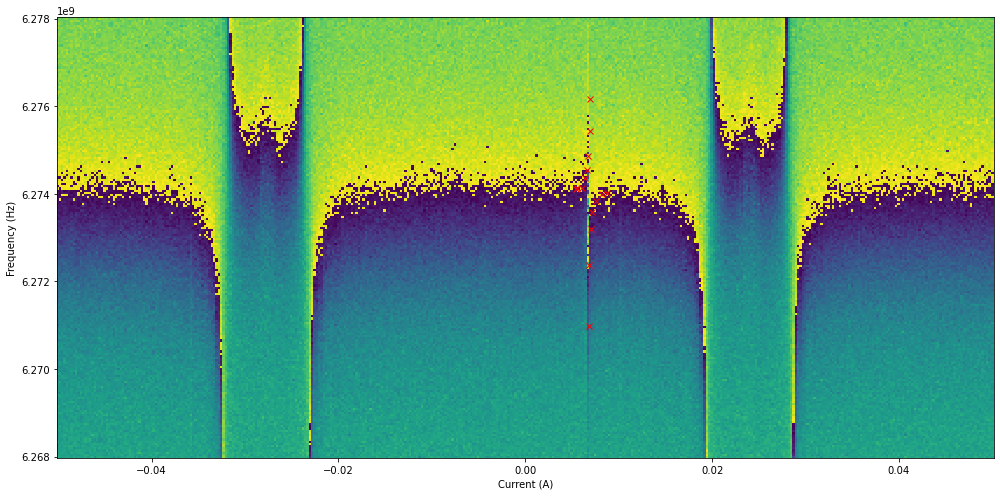

In [55]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q2_coil1, f_vna__fs_q2_coil1, phase__fs_q2_coil1.T,shading='auto')


if True:
    #I_ss__c2_fs = 0.00254
    #ax.axvline(x=I_ss__c2_fs,ls='--',color='red')
    #ax.text(s=' {} mA'.format(round(I_ss__c2_fs*1e3,5)),x=I_ss__c2_fs, y=ax.get_ylim()[0], ha='left', va='bottom', size=20,color='red')
    #print('I_ss__c2_fs= {} mA'.format(round(I_ss__c2_fs*1e3,5)))
    
    #ax.axvline(x=0.00217, ls='--', color='blue')
    #ax.axvline(x=0.00291, ls='--', color='blue')    
    print((-0.000541+0.000565)/2)

#ax.set_xlim([0.0015,0.0035])
if True:
    #fr_ss__c2=6.27544*1e9
    #ax.axhline(y=fr_ss__c2, ls='--', color='red')
    #ax.text(s=' {} GHz'.format(round(fr_ss__c2*1e-9,5)),x=ax.get_xlim()[0],y=fr_ss__c2, ha='left', va='bottom', size=20,color='red')
    print('fr_ss__c2= {} GHz'.format(round(fr_ss__c2*1e-9,5)))

ax.plot(current_q2_coil1, fres_q2_coil1, marker='x',color='red',ls='')

ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

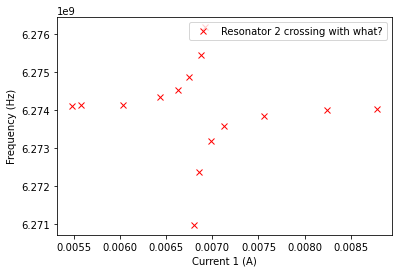

In [56]:
plt.plot(current_q2_coil1, fres_q2_coil1, marker='x',color='red',ls='', label = 'Resonator 2 crossing with what?')

plt.ylabel('Frequency (Hz)')
plt.xlabel('Current 1 (A)')
plt.legend()

If this was qubit 1, we would see it crossing several times with periodicity 3.21 mA

If this was qubit 3, we would see a periodicity of 100 mA which is the width of the window. But there is only one crossing.

Both is not the case ...

## Coil 3: Sweep $I_3$

In [57]:
with open(os.getcwd() + data_dir + r'\f_vna__fs_q2_coil3.pkl', 'rb') as f:
    f_vna__fs_q2_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\current__fs_q2_coil3.pkl', 'rb') as f:
    current__fs_q2_coil3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\phase__fs_q2_coil3.pkl', 'rb') as f:
    phase__fs_q2_coil3 = pickle.load(f)

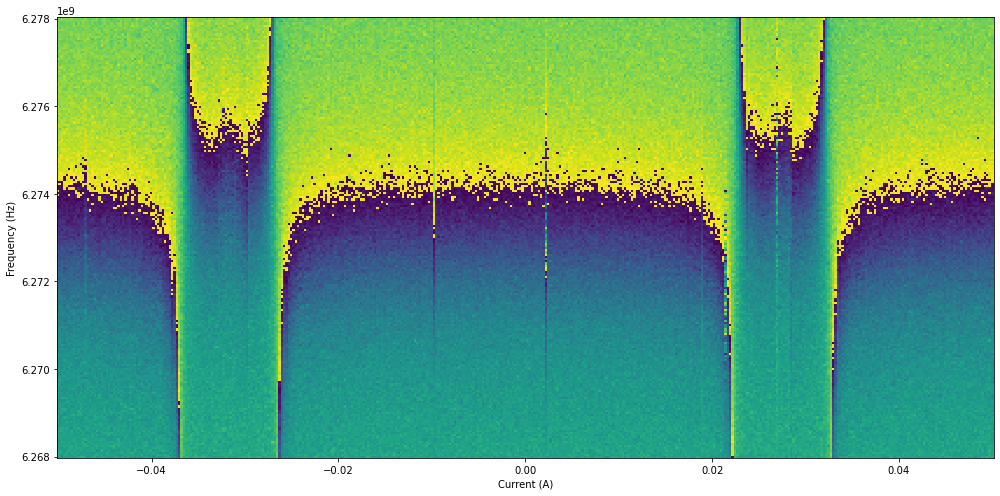

In [58]:
fig, ax = plt.subplots(1,1, figsize = (14,7))

ax.pcolor(current__fs_q2_coil3, f_vna__fs_q2_coil3, phase__fs_q2_coil3.T,shading='auto')


ax.set_xlabel('Current (A)')
ax.set_ylabel('Frequency (Hz)')


fig.tight_layout()
plt.show()

It is 10 mA between the crossings

qubit 3 would have a periodicity of 2.4 mA
qubit 1 would have a periodicity of 150 mA

Not sure what the extra crossings are ...

# Summary resonator spectroscopy

Be aware that the x axis is in a sense artificial, because we don't align all three external fluxes. All curves are shifted with respect to each other depending on the experiment 

You can also see that the crossings are very small for resonator 2. This is because we didnt take care of engineering the readout of this qubit as it is supposed to be the coupler qubit. Also the measurements are very noisy as you may have moticed. This is because we used our "worst" output line for the readout of the coupler qubit to save the good lines for the actual qubits 1 and 3.

## compare resonators 1 to 3 of coupled system

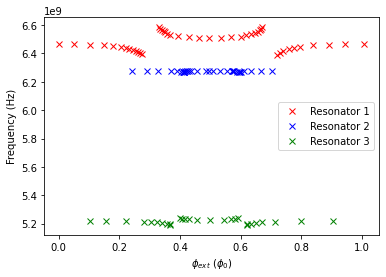

In [59]:
plt.plot(phi_q1_coil1, fres_q1_coil1, marker='x',color='red',ls='', label = 'Resonator 1')
plt.plot(phi_q2_coil2, fres_q2_coil2, marker='x',color='blue',ls='', label = 'Resonator 2')
plt.plot(phi_q3_coil3, fres_q3_coil3, marker='x',color='green',ls='', label = 'Resonator 3')


#plt.ylim([6.2e9, 6.33e9])
plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')
plt.legend()

## Compare coupled circuit resonator 1 to single circuit resonator 1

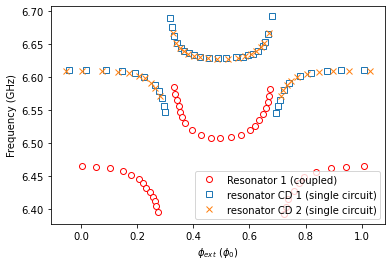

In [60]:
plt.plot(phi_q1_coil1, fres_q1_coil1*1e-9, marker='o',color='red',ls='', mfc = 'white', label = 'Resonator 1 (coupled)')

plt.plot(phase_q1_crossings_CD1, freq_q1_single_circuit_1_crossings*1e-9, 's', mfc = 'white', label = 'resonator CD 1 (single circuit)')

plt.plot(phase_q1_crossings_CD2, freq_q1_single_circuit_2_crossings*1e-9, 'x', label = 'resonator CD 2 (single circuit)')

plt.ylabel('Frequency (GHz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

plt.legend()

# Qubit 1 (qR7)

In [61]:
with open(os.getcwd() + data_dir + r'\x__q1_tt_low_q1.pkl', 'rb') as f:
    x__q1_tt_low = pickle.load(f)[0]
with open(os.getcwd() + data_dir + r'\y__q1_tt_low_q1.pkl', 'rb') as f:
    y__q1_tt_low = pickle.load(f)[0]
    
with open(os.getcwd() + data_dir + r'\x__q1_tt_up_q1.pkl', 'rb') as f:
    x__q1_tt_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'\y__q1_tt_up_q1.pkl', 'rb') as f:
    y__q1_tt_up = pickle.load(f)

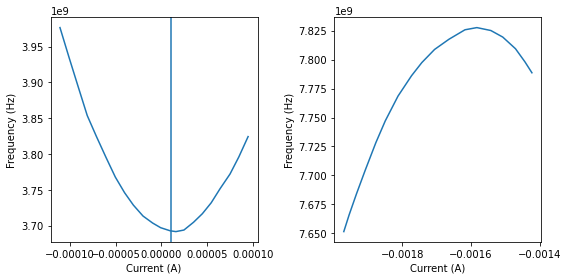

In [62]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))
ax[0].plot(x__q1_tt_low, y__q1_tt_low )
ax[0].axvline(1e-5)
I_ss__q1_tt_low = 1e-5

ax[1].plot(x__q1_tt_up, y__q1_tt_up )

ax[0].set_ylabel('Frequency (Hz)')
ax[1].set_ylabel('Frequency (Hz)')

ax[0].set_xlabel('Current (A)')
ax[1].set_xlabel('Current (A)')

fig.tight_layout()

In [63]:
x__q1_tt = np.concatenate([x__q1_tt_low, x__q1_tt_up])
y__q1_tt = np.concatenate([y__q1_tt_low, y__q1_tt_up])

In [64]:
phi_q1_tt = (x__q1_tt - I_ss__q1_tt_low + I0_q1/2  ) /I0_q1

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

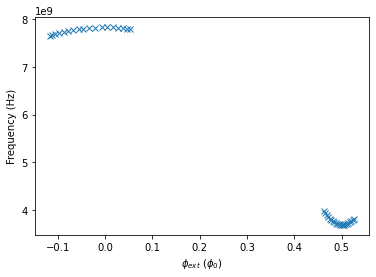

In [65]:
plt.plot(phi_q1_tt, y__q1_tt, 'x')
plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

## Fit results (only qubit mode)

In [109]:
Lq_q1_fit= 22.06 #nH
Cq_q1_fit= 32.15 #fF
Ej_q1_fit= 6.19 #GHz

fq_q1_fit = 3.699  #GHz

## Estimate resonator inductance from geometry

In [110]:
# length of qubit loop inductance in um
l_q = 36.7 + 39.3

# asymmetry of qubit loop in um
l_delta = (39.3 - 36.7)/2

#length of readout inductance in um
l_r = 50

#inductance per length (nH/um)
L_um = Lq_q1_fit/l_q

# asymmetry in nH
Delta = l_delta*L_um
# readout inductance in nH
L_r = l_r*L_um

print('Delta = ' + str(Delta))
print('Lr = ' + str(L_r))

# a good estimate for the effective resonator inductance is then
L_R = L_r + Lq_q1_fit/4 # or factor of 4 bigger for you
print('L_R = ' + str(L_R))

Delta = 0.37734210526315703
Lr = 14.513157894736842
L_R = 20.028157894736843


# Qubit 2 (bG1)

In [66]:
with open(os.getcwd() + data_dir + r'\x__q2_tt_low_q2.pkl', 'rb') as f:
    x__q2_tt_low = pickle.load(f)
with open(os.getcwd() + data_dir + r'\y__q2_tt_low_q2.pkl', 'rb') as f:
    y__q2_tt_low = pickle.load(f)
    
with open(os.getcwd() + data_dir + r'\x__q2_tt_up_q2.pkl', 'rb') as f:
    x__q2_tt_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'\y__q2_tt_up_q2.pkl', 'rb') as f:
    y__q2_tt_up = pickle.load(f)

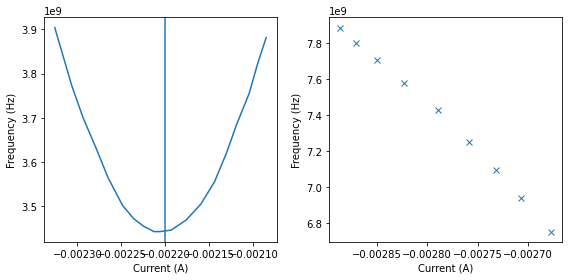

In [67]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))
ax[0].plot(x__q2_tt_low, y__q2_tt_low )
ax[0].axvline(-2.2e-3)
I_ss__q2_tt_low = -2.2e-3

ax[1].plot(x__q2_tt_up, y__q2_tt_up , 'x')

ax[0].set_ylabel('Frequency (Hz)')
ax[1].set_ylabel('Frequency (Hz)')

ax[0].set_xlabel('Current (A)')
ax[1].set_xlabel('Current (A)')

fig.tight_layout()

In [68]:
x__q2_tt = np.concatenate([x__q2_tt_low, x__q2_tt_up])
y__q2_tt = np.concatenate([y__q2_tt_low, y__q2_tt_up])

In [69]:
phi_q2_tt = (x__q2_tt - I_ss__q2_tt_low + I0_c2/2  ) /I0_c2

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

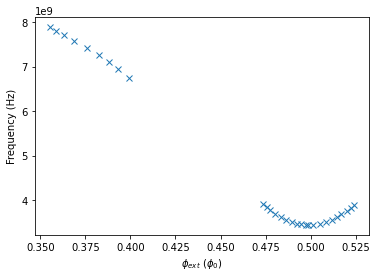

In [70]:
plt.plot(phi_q2_tt, y__q2_tt, 'x')
plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

## Fit results (only qubit mode)

In [107]:
Lq_c2_fit= 20.21 #nH
Cq_c2_fit= 22.70 #fF
Ej_c2_fit= 9.57 #GHz

fq_c2_fit = 3.437  #GHz

## Estimate resonator inductance from geometry

In [108]:
# length of qubit loop inductance in um
l_q = 27.6 + 28.4

# asymmetry of qubit loop in um
l_delta = (28.4 - 27.6)/2

#length of readout inductance in um
l_r = 56

#inductance per length (nH/um)
L_um = Lq_c2_fit/l_q

# asymmetry in nH
Delta = l_delta*L_um
# readout inductance in nH
L_r = l_r*L_um

print('Delta = ' + str(Delta))
print('Lr = ' + str(L_r))

# a good estimate for the effective resonator inductance is then
L_R = L_r + Lq_c2_fit/4 # or factor of 4 bigger for you
print('L_R = ' + str(L_R))

Delta = 0.14435714285714235
Lr = 20.21
L_R = 25.262500000000003


# Qubit 3 (qS16)

In [71]:
with open(os.getcwd() + data_dir + r'\x__q3_tt_low_q3.pkl', 'rb') as f:
    x__q3_tt_low = pickle.load(f)
with open(os.getcwd() + data_dir + r'\y__q3_tt_low_q3.pkl', 'rb') as f:
    y__q3_tt_low = pickle.load(f)
    
with open(os.getcwd() + data_dir + r'\x__q3_tt_up_q3.pkl', 'rb') as f:
    x__q3_tt_up = pickle.load(f)
with open(os.getcwd() + data_dir + r'\y__q3_tt_up_q3.pkl', 'rb') as f:
    y__q3_tt_up = pickle.load(f)

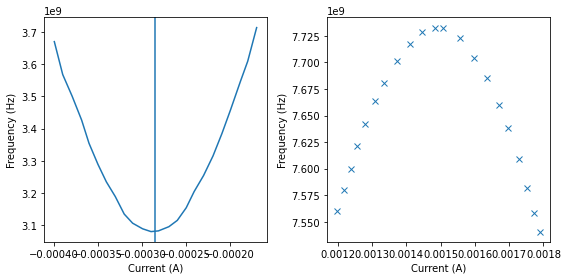

In [72]:
fig, ax = plt.subplots(1, 2, figsize = (8,4))
ax[0].plot(-x__q3_tt_low, y__q3_tt_low )
ax[0].axvline(-2.85e-4)
I_ss__q3_tt_low = -2.85e-4

ax[1].plot(x__q3_tt_up, y__q3_tt_up , 'x')

ax[0].set_ylabel('Frequency (Hz)')
ax[1].set_ylabel('Frequency (Hz)')

ax[0].set_xlabel('Current (A)')
ax[1].set_xlabel('Current (A)')

fig.tight_layout()

In [73]:
x__q3_tt = np.concatenate([x__q3_tt_low, x__q3_tt_up])
y__q3_tt = np.concatenate([y__q3_tt_low, y__q3_tt_up])

In [74]:
phi_q3_tt = (-x__q3_tt - I_ss__q3_tt_low + I0_q3/2  ) /I0_q3

Text(0.5, 0, '$\\phi_{ext}$ ($\\phi_0$)')

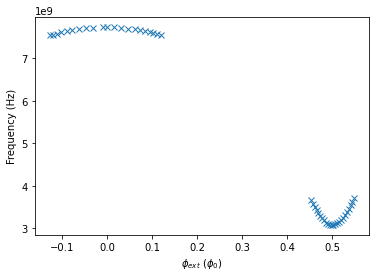

In [75]:
plt.plot(phi_q3_tt, y__q3_tt, 'x')
plt.ylabel('Frequency (Hz)')
plt.xlabel('$\phi_{ext}$ ($\phi_0$)')

## Fit results (only qubit mode)

In [111]:
Lq_q3_fit= 31.59 #nH
Cq_q3_fit= 25.20 #fF
Ej_q3_fit= 5.58 #GHz

fq_q3_fit = 3.08 #GHz

## Estimate resonator inductance from geometry

In [112]:
# length of qubit loop inductance in um
l_q = 47 + 51

# asymmetry of qubit loop in um
l_delta = (51 - 47)/2

#length of readout inductance in um
l_r = 39.6

#inductance per length (nH/um)
L_um = Lq_q3_fit/l_q

# asymmetry in nH
Delta = l_delta*L_um
# readout inductance in nH
L_r = l_r*L_um

print('Delta = ' + str(Delta))
print('Lr = ' + str(L_r))

# a good estimate for the effective resonator inductance is then
L_R = L_r + Lq_q3_fit/4 # or factor of 4 bigger for you
print('L_R = ' + str(L_R))

Delta = 0.6446938775510204
Lr = 12.764938775510204
L_R = 20.662438775510203


# Summary qubit and resonator spectroscopy

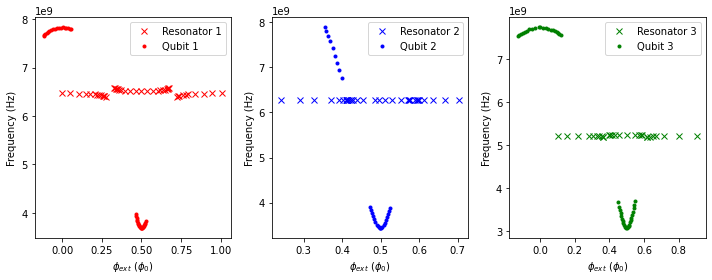

In [76]:
fig, ax = plt.subplots(1, 3, figsize = (10, 4))

ax[0].plot(phi_q1_coil1, fres_q1_coil1, marker='x',color='red',ls='', label = 'Resonator 1')
ax[0].plot(phi_q1_tt, y__q1_tt, marker='.',color='red',ls='', label = 'Qubit 1')
ax[0].set_ylabel('Frequency (Hz)')
ax[0].set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax[0].legend()

ax[1].plot(phi_q2_coil2, fres_q2_coil2, marker='x',color='blue',ls='', label = 'Resonator 2')
ax[1].plot(phi_q2_tt, y__q2_tt, marker='.',color='blue',ls='', label = 'Qubit 2')
ax[1].set_ylabel('Frequency (Hz)')
ax[1].set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax[1].legend()

ax[2].plot(phi_q3_coil3, fres_q3_coil3, marker='x',color='green',ls='', label = 'Resonator 3')
ax[2].plot(phi_q3_tt, y__q3_tt, marker='.',color='green',ls='', label = 'Qubit 3')
ax[2].set_ylabel('Frequency (Hz)')
ax[2].set_xlabel('$\phi_{ext}$ ($\phi_0$)')
ax[2].legend()

fig.tight_layout()

# Estimate fit uncertainties

Below, we tabulate 4 sets of fit results from 3 different cooldowns for qubit 1 in the coupled configuration

In [115]:
Lq = np.array([26.98, 25.05, 24, 22.06]) # nH
Cq = np.array([26.5, 28.41, 29.5, 32.15]) # fF
Ej = np.array([5.39, 5.61, 5.8, 6.19]) # GHz

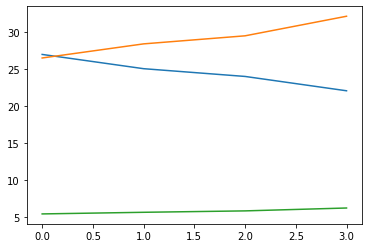

In [118]:
plt.plot(Lq)
plt.plot(Cq)
plt.plot(Ej)

In [119]:
np.std(Lq)

1.7786564451855231

In [120]:
np.std(Cq)

2.042804444874741

In [121]:
np.std(Ej)

0.29380052756930186

# q1-q2-q3 avoided crossing

Below, we fix q1 at its half-flux point around 3.7 GHz, move q2 on resonance, and then sweep q3 through 3.7 GHz.

In the background, we have a flux calibration which converts a set of desired qubit frequencies into a set of currents through the coils. As a result, the x axis corrsponds to a change of $\vec{I}$ along all components. So what is important is only the y axis that gives the measured energies. 

In [77]:
with open(os.getcwd() + data_dir + r'\x__tt_3LevAC.pkl', 'rb') as f:
    x__tt_3LevAC = pickle.load(f)
with open(os.getcwd() + data_dir + r'\y__tt_3LevAC.pkl', 'rb') as f:
    y__tt_3LevAC = pickle.load(f)

Text(0.5, 0, 'Sweep parameters (a.u.)')

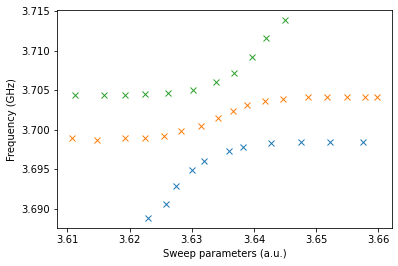

In [78]:
for i in range(len(x__tt_3LevAC)):
    plt.plot(x__tt_3LevAC[i], y__tt_3LevAC[i], 'x')
    
plt.ylabel('Frequency (GHz)')
plt.xlabel('Sweep parameters (a.u.)')

# q1 - q3 avoided crossing while q2 is off-resonant

We keep q1 at its half-flux point ~ 3.7 GHz and move q2 to its half-flux point ~3.4 GHz such that they are 100's Mhz detuned. Then we sweep q3 through q1 and try to measure the frequency of qubit 1 as precisely as possible via Ramsey interferometry. Notice the different scale of the y axis which is now showing kHz differences. It is not possible to measure clear anticrossings but we observe a change of f_q1 once q3 moves through q1 which indicates the "small" cross-talk

In [79]:
with open(os.getcwd() + data_dir + r'\curr_vec_Ramsey_offres_q1.pkl', 'rb') as f:
    curr_vec_Ramsey_offres_q1 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\f_vec_Ramsey_offres_q1.pkl', 'rb') as f:
    f_vec_Ramsey_offres_q1 = pickle.load(f)[0]

Text(0.5, 0, 'Sweep parameter (a.u.)')

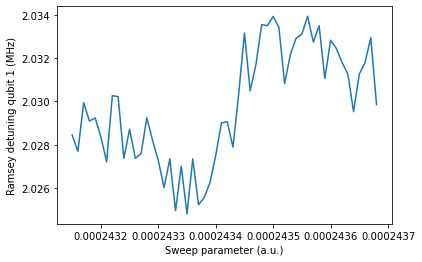

In [80]:
plt.plot(curr_vec_Ramsey_offres_q1, f_vec_Ramsey_offres_q1)
plt.ylabel('Ramsey detuning qubit 1 (MHz)')
plt.xlabel('Sweep parameter (a.u.)')

Now we check the frequency of qubit 3 versus the sweep parameter to verify that q3 crosses q1

In [81]:
with open(os.getcwd() + data_dir + r'\curr_vec_tt_offres_q3.pkl', 'rb') as f:
    curr_vec_tt_offres_q3 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\f_vec_tt_offres_q3.pkl', 'rb') as f:
    f_vec_tt_offres_q3 = pickle.load(f)

Text(0.5, 0, 'Sweep parameter (a.u.)')

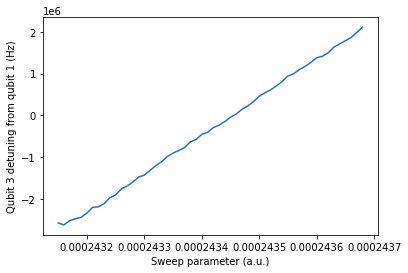

In [82]:
plt.plot(curr_vec_tt_offres_q3, f_vec_tt_offres_q3 - 200e6)
# 200 MHz IF frequency is set to match q1 frequency
plt.ylabel('Qubit 3 detuning from qubit 1 (Hz)')
plt.xlabel('Sweep parameter (a.u.)')

# q1 - q2 avoided crossing while q3 is off-resonant

Move q2 through q1 which is at half-flux

In [83]:
with open(os.getcwd() + data_dir + r'\x__tt_q1_q2.pkl', 'rb') as f:
    x__tt_q1_q2 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\y__tt_q1_q2.pkl', 'rb') as f:
    y__tt_q1_q2 = pickle.load(f)
x__tt_q1_q2 = np.concatenate([x__tt_q1_q2[0], x__tt_q1_q2[1] ])
y__tt_q1_q2 = np.concatenate([y__tt_q1_q2[0], y__tt_q1_q2[1] ])

Text(0.5, 0, 'Sweep parameter (a.u.)')

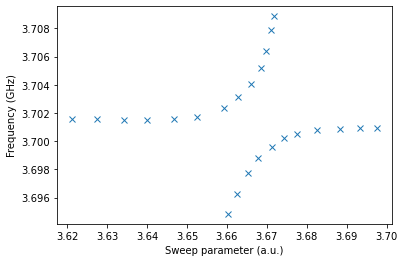

In [84]:
plt.plot(x__tt_q1_q2, y__tt_q1_q2, 'x')
plt.ylabel('Frequency (GHz)')
plt.xlabel('Sweep parameter (a.u.)')

# Time domain

## coherent population oscillations

+ q1 and q3 at frequency of q1 half flux: 3.68 GHz, q2 rests at its own half flux around 3.45 GHz
+ pi pulse on qubit 1 or 3, respectively
+ Then rectangular voltage pulse on FBL of q2
+ then read out q1 and q3 simultaneously

In [350]:
delta_q2 = 680 - 450 # in MHz
print(delta_q2)

230


### prepare qubit1, qubit3 in [0, 1]

In [351]:
with open(os.getcwd() + data_dir + r'\time_DC_pop_osc_0_1.pkl', 'rb') as f:
    t_vec_01 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\FBL_voltage_DC_pop_osc_0_1.pkl', 'rb') as f:
    a_vec_01 = pickle.load(f)
    
with open(os.getcwd() + data_dir + r'\signal_qubit1_0_1.pkl', 'rb') as f:
    i1_01 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\signal_qubit3_0_1.pkl', 'rb') as f:
    i3_01 = pickle.load(f)
    
a_vec = a_vec_01 # in V
t_vec = t_vec_01 # in ns

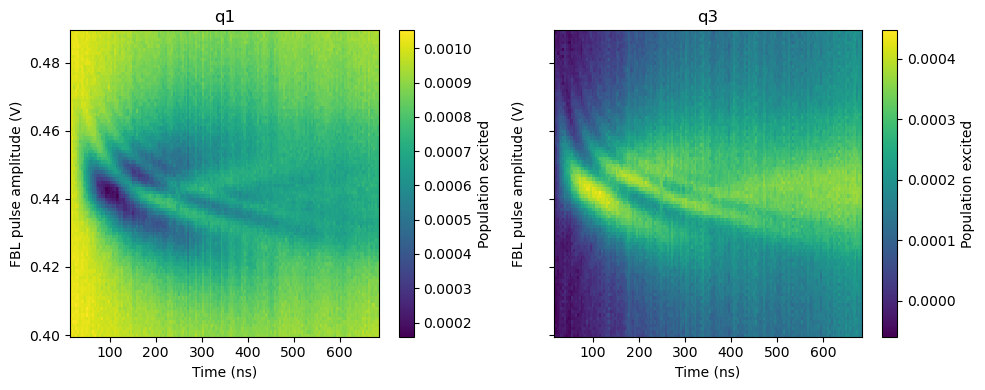

In [352]:
fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (10, 4), dpi = 100)

ax[0].set_title('q1')
c = ax[0].pcolor(t_vec_01, a_vec_01, i1_01.T, shading = 'auto', cmap = 'viridis')
fig.colorbar(c, ax = ax[0], label = 'Population excited')
ax[0].set_ylabel('FBL pulse amplitude (V)')
ax[0].set_xlabel('Time (ns)')

ax[1].set_title('q3')
c = ax[1].pcolor(t_vec_01, a_vec_01, i3_01.T, shading = 'auto', cmap = 'viridis')
fig.colorbar(c, ax = ax[1], label = 'Population excited')
ax[1].set_ylabel('FBL pulse amplitude (V)', labelpad=20)
ax[1].set_xlabel('Time (ns)')

idx = 42
#ax[0].axhline(a_vec_01[idx], color = 'red')

fig.tight_layout()
plt.show()

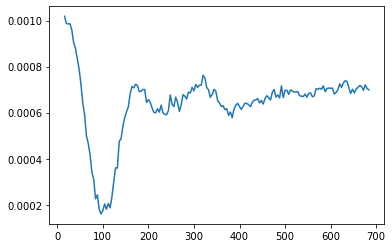

In [85]:
plt.plot(t_vec_01, i1_01[:,42])

### prepare qubit1, qubit3 in [1, 0]

In [88]:
with open(os.getcwd() + data_dir + r'\time_DC_pop_osc_1_0.pkl', 'rb') as f:
    t_vec_10 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\FBL_voltage_DC_pop_osc_1_0.pkl', 'rb') as f:
    a_vec_10 = pickle.load(f)
    
with open(os.getcwd() + data_dir + r'\signal_qubit1_1_0.pkl', 'rb') as f:
    i1_10 = pickle.load(f)
with open(os.getcwd() + data_dir + r'\signal_qubit3_1_0.pkl', 'rb') as f:
    i3_10 = pickle.load(f)

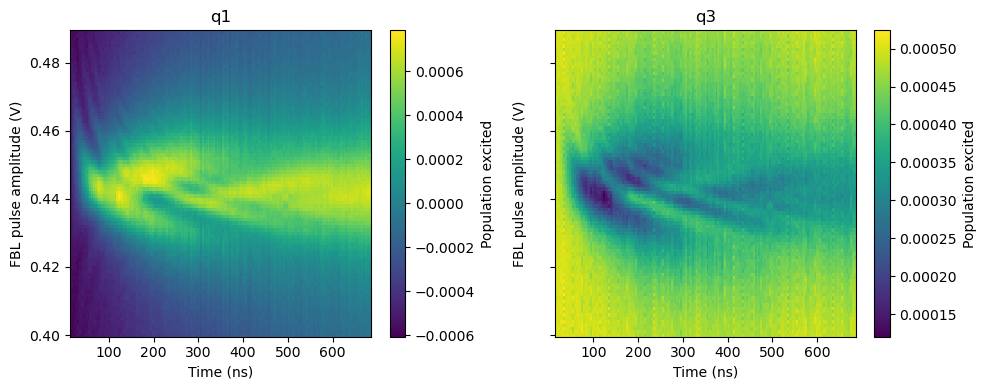

In [89]:
fig, ax = plt.subplots(1, 2, sharex = True, sharey = True, figsize = (10, 4), dpi = 100)

ax[0].set_title('q1')
c = ax[0].pcolor(t_vec_10, a_vec_10, i1_10.T, shading = 'auto', cmap = 'viridis')
fig.colorbar(c, ax = ax[0], label = 'Population excited')
ax[0].set_ylabel('FBL pulse amplitude (V)')
ax[0].set_xlabel('Time (ns)')

ax[1].set_title('q3')
c = ax[1].pcolor(t_vec_10, a_vec_10, i3_10.T, shading = 'auto', cmap = 'viridis')
fig.colorbar(c, ax = ax[1], label = 'Population excited')
ax[1].set_ylabel('FBL pulse amplitude (V)', labelpad=20)
ax[1].set_xlabel('Time (ns)')

fig.tight_layout()
plt.show()

### together and scaled

the readout pulse length is not much smaller than T1. We don't want to take into account readout errors. For that reason, we scale the readout signal to its minimum and maximum, when not playing/playing a pi pulse, which corresponds to the maximal qubit inversion that we can reach after readout

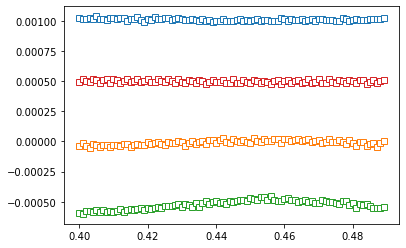

In [94]:
# ground state qubit 1
plt.plot(a_vec, i1_01[0,:], 's', mfc = 'white')
i1_ground_reference = np.mean(i1_01[0,:10])
# excited state qubit 3
plt.plot(a_vec, i3_01[0,:], 's', mfc = 'white')
i3_excited_reference = np.mean(i3_01[0,:10])
# excited state qubit 1
plt.plot(a_vec, i1_10[0,:], 's', mfc = 'white')
i1_excited_reference = np.mean(i1_10[0,:10])
# ground state qubit 3
plt.plot(a_vec, i3_10[0,:], 's', mfc = 'white')
i3_ground_reference = np.mean(i3_10[0,:10])

In [96]:
pop1_01 = (i1_01 - i1_ground_reference)/ (i1_excited_reference - i1_ground_reference)
pop3_01 = (i3_01 - i3_ground_reference)/ (i3_excited_reference - i3_ground_reference)
pop1_10 = (i1_10 - i1_ground_reference)/ (i1_excited_reference - i1_ground_reference)
pop3_10 = (i3_10 - i3_ground_reference)/ (i3_excited_reference - i3_ground_reference)

In [400]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": 'Times New Roman',
    "font.size"   : 16
})

C:\Users\SIMONG~1\AppData\Local\Temp/ipykernel_14504/1231314147.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


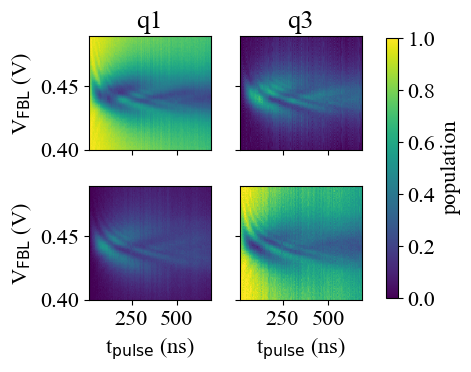

In [407]:
fig, ax = plt.subplots(2, 2, sharex = True, sharey = True, figsize = (4, 4), dpi = 100)

ax[0,0].set_title('q1')
c = ax[0,0].pcolor(t_vec_10, a_vec_10, pop1_10.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)
ax[0,0].set_ylabel('V$_{\mathrm{FBL}}$ (V)')

ax[0,1].set_title('q3')
c = ax[0,1].pcolor(t_vec_10, a_vec_10, pop3_10.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)



#ax[1,0].set_title('q1')
c = ax[1,0].pcolor(t_vec_01, a_vec_01, pop1_01.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)
ax[1,0].set_ylabel('V$_{\mathrm{FBL}}$ (V)')
ax[1,0].set_xlabel('t$_{\mathrm{pulse}}$ (ns)')
ax[1,1].set_xlabel('t$_{\mathrm{pulse}}$ (ns)')

#ax[1,1].set_title('q3')
c = ax[1,1].pcolor(t_vec_01, a_vec_01, pop3_01.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)

#fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1, 0.22, 0.03, 0.65])
fig.colorbar(c, cax=cbar_ax, label = 'population')

fig.tight_layout()
plt.show()

## Qtip simulation

In [291]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image
from qutip import (Qobj, about, basis, coherent, coherent_dm, create, destroy,
                   expect, fock, fock_dm, mesolve, qeye, sigmax, sigmay,
                   sigmaz, tensor, thermal_dm, Options)
from qutip import (about, basis, brmesolve, destroy, identity, ket2dm, mesolve,
                   plot_energy_levels, plot_expectation_values, tensor)

import scipy

### Qubit Operators

In [292]:
Sz1 = tensor(sigmaz(), qeye(2), qeye(2))
Sz2 = tensor(qeye(2), sigmaz(), qeye(2))
Sz3 = tensor(qeye(2), qeye(2), sigmaz())

Sx1 = tensor(sigmax(), qeye(2), qeye(2))
Sx2 = tensor(qeye(2), sigmax(), qeye(2))
Sx3 = tensor(qeye(2), qeye(2), sigmax())

Sy1 = tensor(sigmay(), qeye(2), qeye(2))
Sy2 = tensor(qeye(2), sigmay(), qeye(2))
Sy3 = tensor(qeye(2), qeye(2), sigmay())

Sminus = Qobj([[0, 1], [0, 0]])
Splus = Qobj([[0, 0], [1, 0]])


Sminus1 = tensor(Sminus, qeye(2), qeye(2))
Sminus2 = tensor(qeye(2), Sminus, qeye(2))
Sminus3 = tensor(qeye(2), qeye(2), Sminus)

### Flux bias line response with self-inductance

In [418]:
def flux_bias_line_response(t, args):
    
    if t <= args['pulse_len']:
        response = args['amplitude'] * ( 1 - np.exp(-(t / args['T_rise']) ) )
    else:
        response_sat = args['amplitude'] * ( 1 - np.exp(-(args['pulse_len'] / args['T_rise']) ) )
        response = response_sat * np.exp(-((t - args['pulse_len'])/ args['T_fall']))
        
    return response

def flux_bias_line_rise(t, args):
    
    # in MHz, assume q2 frequency is linear close to the crossing (neglect parabolic shape close to sweet spot)
    response = args['amplitude'] * ( 1 - np.exp(-(t / args['T']) ) )

    return response*2*np.pi

def flux_bias_line_fall(t, args):
    
    # in MHz, assume q2 frequency is linear close to the crossing (neglect parabolic shape close to sweet spot)
    response = args['amplitude'] * np.exp(-(t / args['T']) ) 

    return response*2*np.pi

In [419]:
plt.rcParams.update({
    "text.usetex": False,
    "font.family": 'Times New Roman',
    "font.size"   : 28
})

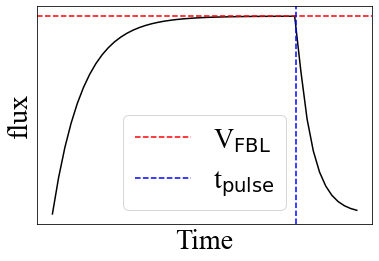

In [420]:
t_vec = np.linspace(0, 1, 50)

args = {'amplitude': 1, 'T_rise': 0.1, 'T_fall': 0.05, 'pulse_len': 0.8}
#args = {'amplitude': 1, 'T': 0.05}

flux_vec = np.array([flux_bias_line_response(t, args) for t in t_vec])


plt.plot(t_vec, flux_vec, 'k')
plt.xticks([])
plt.yticks([])

plt.axhline(1, color = 'red', linestyle = '--', label = 'V$_{\mathrm{FBL}}$')
plt.axvline(0.8, color = 'blue', linestyle = '--', label = 't$_{\mathrm{pulse}}$')

plt.ylabel('flux')
plt.xlabel('Time')

plt.legend()

Problem: For every measurement, the flux will fall before the readout of the qubits. As such, the qubits will undergo an additional Landau-Zener transition if the detuning is positive, but not if the detuning is negative. How to compute?

+ Compute with mesolve for every time step t and interpret t as the pulse length
+ Take results as initial state for next simulation
+ simulate the flux tail separately


### function to compute coupled chain with arbitrary flux function for q2

In [421]:
def compute_coupled_chain(tlist, psi0, eps_12, eps_23, q3_detuning, q2_detuning, T1_vec, T2_vec, FBL_func, FBL_args):
   
    # in MHz
    H0 = (eps_12*Sx1*Sx2 + eps_23*Sx2*Sx3  + 3800 * Sz1 + (3800 - q3_detuning) * Sz3 + (3800 - q2_detuning)*Sz2 )*2*np.pi
    
    gamma_phi_1 = 1/(T2_vec[0]*2*np.pi)
    gamma_phi_2 = 1/(T2_vec[1]*2*np.pi)
    gamma_phi_3 = 1/(T2_vec[2]*2*np.pi)
    gamma_rel_1 = 1/(T1_vec[0]*2*np.pi)
    gamma_rel_2 = 1/(T1_vec[1]*2*np.pi)
    gamma_rel_3 = 1/(T1_vec[2]*2*np.pi)
    
    c_ops = [np.sqrt(gamma_phi_1) * Sz1, np.sqrt(gamma_phi_2) * Sz2, np.sqrt(gamma_phi_3) * Sz3, np.sqrt(gamma_rel_1) * Sminus1, np.sqrt(gamma_rel_2) * Sminus2, np.sqrt(gamma_rel_3) * Sminus3]
    
    H1 = Sz2
    H = [H0,[H1,FBL_func]]
    
    result = mesolve(H, psi0, tlist, c_ops, args = FBL_args, options= Options(nsteps=2000))
    
    return result

### compute rise of the FBL flux

In [437]:
eps_12 = 3
eps_23 = 3

q2_detuning = 230
q3_detuning = 0.5

T1_vec = np.array([2.09, 0.1, 0.84])
T2_vec = np.array([1.71, 0.1, 0.165])

state_1 = Qobj([[0], [1]])
state_0 = Qobj([[1], [0]])

tlist = np.linspace(0, 0.75, 151)
# [0, 1]
psi0 = tensor(state_0, state_0, state_1)

FBL_amp_vec = np.linspace(210, 250, 50) 

result_mat = np.zeros((FBL_amp_vec.size, tlist.size), dtype = object)

FBL_rise_time = 0.05

FBL_crosstalk = 5e-3

for i, amp in enumerate(FBL_amp_vec):
    print(i)
    FBL_args = {'amplitude': amp, 'T': FBL_rise_time}
    q3_detuning = FBL_crosstalk*amp
    result = compute_coupled_chain(tlist, psi0, eps_12, eps_23, q3_detuning, q2_detuning, T1_vec, T2_vec, flux_bias_line_rise, FBL_args)
    result_mat[i,:] = result.states

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [435]:
Sz1_exp_vec = np.zeros((FBL_amp_vec.size, tlist.size))
Sz2_exp_vec = np.zeros((FBL_amp_vec.size, tlist.size))
Sz3_exp_vec = np.zeros((FBL_amp_vec.size, tlist.size))

for i, amp in enumerate(FBL_amp_vec):
    Sz1_exp_vec[i,:] = expect(Sz1, result_mat[i,:])
    Sz2_exp_vec[i,:] = expect(Sz2, result_mat[i,:])
    Sz3_exp_vec[i,:] = expect(Sz3, result_mat[i,:])

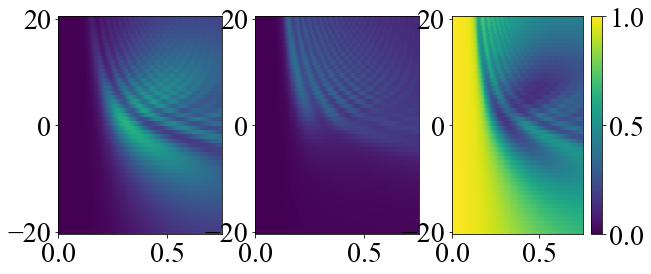

In [436]:
fig, ax = plt.subplots(1, 3, figsize = (10, 4))

ax[0].pcolor(tlist, FBL_amp_vec - q2_detuning, -(Sz1_exp_vec-1)/2, vmin = 0, vmax = 1, shading = 'auto')

ax[1].pcolor(tlist, FBL_amp_vec - q2_detuning, -(Sz2_exp_vec-1)/2, vmin = 0, vmax = 1, shading = 'auto')
 
c = ax[2].pcolor(tlist, FBL_amp_vec - q2_detuning, -(Sz3_exp_vec-1)/2, vmin = 0, vmax = 1, shading = 'auto')

fig.colorbar(c, ax = ax[2])

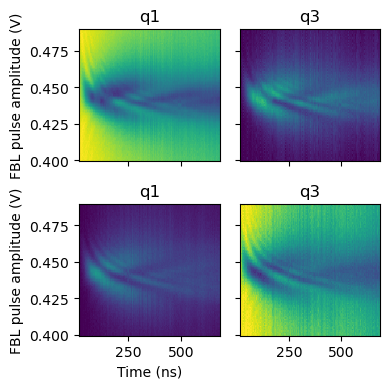

In [181]:
fig, ax = plt.subplots(2, 2, sharex = True, sharey = True, figsize = (4, 4), dpi = 100)

ax[0,0].set_title('q1')
c = ax[0,0].pcolor(t_vec_10, a_vec_10, pop1_10.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)
ax[0,0].set_ylabel('FBL pulse amplitude (V)')

ax[0,1].set_title('q3')
c = ax[0,1].pcolor(t_vec_10, a_vec_10, pop3_10.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)



ax[1,0].set_title('q1')
c = ax[1,0].pcolor(t_vec_01, a_vec_01, pop1_01.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)
ax[1,0].set_ylabel('FBL pulse amplitude (V)')
ax[1,0].set_xlabel('Time (ns)')

ax[1,1].set_title('q3')
c = ax[1,1].pcolor(t_vec_01, a_vec_01, pop3_01.T, shading = 'auto', cmap = 'viridis', vmin = 0, vmax = 1)

fig.tight_layout()
plt.show()